In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.metrics import matthews_corrcoef, confusion_matrix
import matplotlib.ticker as mtick

from celeb import CelebBase, CelebDataset

mpl.rcParams["figure.dpi"] = 150 # 600
%config InlineBackend.figure_format = 'retina'

In [ ]:
dataset = CelebDataset(
            "datasets/CelebAMask-HQ/",
            224,
            augment_data=True,
            target_label=["Blond_Hair", "Male"],
            target_masks=["skin"],
        )
data_dir = "datasets/CelebAMask-HQ/"
label_df = pd.read_csv(os.path.join(data_dir, 'CelebAMask-HQ-attribute-anno.csv'), sep="\\s+")
label_df.replace({-1: 0}, inplace=True)

In [ ]:
def one_sided_correlation(true, pred): # target, Male
    tn, fn, fp, tp = confusion_matrix(true, pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    fpr = fp / (fp + tn)
    tnr = tn / (fp + tn)
    return abs(tpr - fnr) - abs(fpr - tnr)
def one_sided_correlation_print(true, pred): # target, Male
    C = confusion_matrix(true, pred)
    tn, fn, fp, tp = confusion_matrix(true, pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    fpr = fp / (fp + tn)
    tnr = tn / (fp + tn)
    print(C)
    return abs(tpr - fnr) - abs(fpr - tnr)

In [ ]:
colors = ["#8ecae6","#219ebc","#023047","#ffb703","#fb8500", "#e63946","#a8dadc","#457b9d", '#8d99ae', '#00a896', '#f15bb5', '#e0aaff', '#ca6702', '#ffc8dd']
waterbirds_ap = np.array([[0.8729, 0.0112],
                         [0.8639, 0.0172],
                         [0.8564, 0.0162],
                         [0.8426, 0.0099],
                         [0.7881, 0.0229],
                         [0.7283, 0.0239],
                         [0.5915, 0.0214]]).T
waterbirds_worst_group = np.array([[0.8065,0.0383],
                         [0.8220,0.0577],
                         [0.8432,0.0510],
                         [0.6528,0.0591],
                         [0.5614,0.1172],
                         [0.4519,0.0946],
                         [0.2051,0.0978]]).T
celeb_ap = np.array([[0.9633, 0.0062],
[0.9000, 0.0107],
[0.8900, 0.0061],
[0.8729, 0.0127],
[0.9930, 0.0020],
[0.9801, 0.0054],
[0.6936, 0.0091],
[0.8685, 0.0101],
[0.9522, 0.0073],
[0.9849, 0.0020],
[0.8997, 0.0143],
[0.9251, 0.0069],
[0.9389, 0.0067],
[0.9382, 0.0086],
[0.9415, 0.0099],
[0.9995, 0.0003],
[0.9836, 0.0026],
[0.9863, 0.0027],
[0.9714, 0.0035],
[0.9570, 0.0037],
[0.9974, 0.0012],
[0.9849, 0.0039],
[0.9647, 0.0031],
[0.8527, 0.0116],
[0.9918, 0.0010],
[0.7588, 0.0172],
[0.9598, 0.0068],
[0.7102, 0.0145],
[0.9357, 0.0113],
[0.9433, 0.0052],
[0.9832, 0.0045],
[0.9785, 0.0035],
[0.8221, 0.0202],
[0.9041, 0.0149],
[0.9409, 0.0051],
[0.9924, 0.0027],
[0.9793, 0.0022],
[0.7400, 0.0099],
[0.9414, 0.0054],
[0.9172, 0.0062]]).T
celeb_ap_normalized = np.array([[0.8985, 0.0156],
[0.7931, 0.0204],
[0.8313, 0.0089],
[0.7256, 0.0220],
[0.9776, 0.0061],
[0.9429, 0.0142],
[0.4833, 0.0122],
[0.7296, 0.0177],
[0.8810, 0.0169],
[0.9578, 0.0054],
[0.7563, 0.0284],
[0.8165, 0.0154],
[0.8522, 0.0148],
[0.8205, 0.0219],
[0.8342, 0.0237],
[0.9982, 0.0010],
[0.9427, 0.0087],
[0.9522, 0.0081],
[0.9429, 0.0067],
[0.9234, 0.0063],
[0.9939, 0.0028],
[0.9708, 0.0070],
[0.8785, 0.0098],
[0.6555, 0.0217],
[0.9936, 0.0008],
[0.5295, 0.0283],
[0.8731, 0.0168],
[0.4919, 0.0190],
[0.8188, 0.0272],
[0.8329, 0.0131],
[0.9432, 0.0144],
[0.9600, 0.0063],
[0.6232, 0.0334],
[0.8034, 0.0268],
[0.8574, 0.0096],
[0.9745, 0.0093],
[0.9656, 0.0035],
[0.4689, 0.0145],
[0.8293, 0.0143],
[0.9245, 0.0056]]).T
celeb_worst_group_accuracy = np.array([[0.5302, 0.1050],
[0.3048, 0.1628],
[0.4397, 0.1346],
[0.4552, 0.1246],
[0.9121, 0.0286],
[0.9036, 0.0362],
[0.3455, 0.0598],
[0.2590, 0.1073],
[0.8455, 0.0626],
[0.8879, 0.0422],
[0.9414, 0.0348],
[0.7944, 0.0678],
[0.7355, 0.0996],
[0.5949, 0.0791],
[0.6540, 0.0832],
[0.9708, 0.0163],
[0.7227, 0.0472],
[0.8712, 0.0662],
[0.7034, 0.1646],
[0.7252, 0.0578],
[0.9495, 0.0381],
[0.9010, 0.0480],
[0.7250, 0.0542],
[0.6933, 0.1208],
[0.6083, 0.1155],
[0.5367, 0.0793],
[0.7460, 0.0988],
[0.3291, 0.1643],
[0.7853, 0.0469],
[0.7757, 0.0845],
[0.6701, 0.0668],
[0.8559, 0.0474],
[0.7245, 0.1015],
[0.5806, 0.1630],
[0.6590, 0.1187],
[0.9287, 0.0431],
[0.5609, 0.1400],
[0.2482, 0.0922],
[0.5708, 0.1108],
[0.5536, 0.1261]]).T

In [5]:
def get_correlation(target, confounder_label, score = matthews_corrcoef, split = "val", evaluations_path = None, absolute=True):
    if evaluations_path is None:
        train_label_df = label_df.iloc[np.where(dataset.split_array == dataset.split_dict[split])[0]]
        if absolute:
            return abs(score(train_label_df[target], train_label_df[confounder_label]))
        else:
            return score(label_df[target], label_df[confounder_label])
    else:
        mccs = []
        for file in glob.glob(evaluations_path):
            evaluation_df = pd.read_csv(file, names=list(label_df)[1:]).astype(int)
            mccs.append(score(evaluation_df[target], evaluation_df[confounder_label]))
        if absolute:
            return abs(np.average(mccs)), np.std(mccs)
        else:
            return np.average(mccs), np.std(mccs)

In [ ]:
def plot_waterbirds_mask(
    percentages: list[int],
    normalize_scores,
    fig_size=5,
    attribution: str = "GradCAM",
    results_dir="results/",
    figure_dir="figures/",
):
    width = 0.8
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(fig_size * 1.5, fig_size),
        constrained_layout=True,
    )

    mask_groups = ["bird", "background"]
    mask_group_colors = {
        "bird":1,
        "background":11,
    }
    
    data = {mask_group: ([], []) for mask_group in mask_groups}
    labels = []
    for i, percentage in enumerate(percentages):
        path = os.path.join(
            os.path.dirname(results_dir),
            f'Masks-waterbirds{percentage}_{attribution}_element_wise{"_normalized" if normalize_scores else ""}_averaged_scores.csv',
        )
        results = np.genfromtxt(path, delimiter=",")
        for j, mask_group in enumerate(mask_groups):
            data[mask_group][0].append(results[1-j, 2])
            data[mask_group][1].append(results[1-j, 5])
        # labels.append(f"{percentage}% Bias\nAP:{waterbirds_ap[0][i]:.2f}±{waterbirds_ap[1][i]:.2f}")
        labels.append(f"{percentage}% Bias\nWGA:{waterbirds_worst_group[0][i]:.2f}±{waterbirds_worst_group[1][i]:.2f}")
        

    left = np.zeros(len(percentages))
    for mask_group, datapoint in data.items():
        p = ax.barh(labels[::-1], datapoint[0][::-1], width, xerr=datapoint[1][::-1], capsize=3, 
                    color=colors[mask_group_colors[mask_group]], label=mask_group, left=left, error_kw={"elinewidth":1}), 
        left += datapoint[0][::-1]
    
    ax.set_xlabel('Mask Score', fontsize=16)
    ax.tick_params(axis='x', labelrotation=0, labelsize=13)
    ax.tick_params(axis='y', labelsize=15)
    # ax.set_title(f"Waterbirds Mask Score", fontsize=16)

    legend = ax.legend(loc="upper left", fancybox=True, fontsize=15, framealpha=0.95)
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Waterbirds-Mask{'_Normalized' if normalize_scores else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

In [ ]:
def plot_celeb_heatmap_subgroup(
    mccs: list[float],
    target: str,
    confounder_label: str,
    scores: dict[str, str],
    normalize_scores,
    model_target,
    subgrouping_labels,
    fig_size=5,
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    true_true=False,
    is_averaged=False,
    plot_ground_truth=False
):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=2 if plot_ground_truth else 1,
        figsize=(fig_size * 1.6, fig_size), #figsize=(fig_size * 1.5, fig_size),
        constrained_layout=True,
    )
    
    for i, type in enumerate(["ground truth", "predicted"] if plot_ground_truth else ["predicted"]):
        data = ([], [])
        correlations = ([], [])
        ax = ax[i] if plot_ground_truth else ax
        for mcc in mccs:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Heatmap-{model_target}_mcc{mcc}{subgrouping_labels}_{target}_{confounder_label}_{attribution}_element_wise{"_normalized" if normalize_scores else ""}{"_averaged" if is_averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",").squeeze()
            if true_true:
                data[0].append(results[0])
                data[1].append(results[5])
            else:
                data[0].append(results[4])
                data[1].append(results[9])
            evaluations_path = os.path.join(
                    'results/',
                    'subgroups/evaluations/',
                    f'evaluations-celeb_{model_target}_mcc{mcc}{"-".join(subgrouping_labels)}_resnet50_extended_*.csv'
                )
            correlation = get_correlation(target, confounder_label, matthews_corrcoef, evaluations_path=evaluations_path, absolute=False)
            correlations[0].append(correlation[0])
            correlations[1].append(correlation[1])
        if type == "predicted":
            ax.scatter(correlations[0], data[0], zorder=2.01, c=colors[1])
            ax.errorbar(correlations[0], data[0], xerr=correlations[1], yerr=data[1], fmt="o", alpha=0.5, c=colors[1], elinewidth=1)
        elif type == "ground truth":
            ax.scatter(mccs, data[0], zorder=2.01, c=colors[1])
            ax.errorbar(mccs, data[0], yerr=data[1], fmt="none", alpha=0.5, c=colors[1], elinewidth=1)

        path = os.path.join(
                'final_results/',
                'heatmap/'
                f'Heatmap-{model_target}_{target}_{confounder_label}_{attribution}_element_wise{"_normalized" if normalize_scores else ""}{"_averaged" if is_averaged else ""}_scores.csv',
            )
        results = np.genfromtxt(path, delimiter=",").squeeze()
        ax.plot(get_correlation(target, 'Male', matthews_corrcoef, absolute=False), results[4], c=colors[4], alpha=1, zorder=3.02, marker='s')
        ax.errorbar(get_correlation(target, 'Male', matthews_corrcoef, absolute=False), results[4], yerr=results[9], fmt="none", alpha=0.8, c=colors[4], elinewidth=1, markersize=0)

        ax.set_xlabel('Absolute MCC', fontsize=25)
        ax.set_ylabel('Heatmap Score', fontsize=26)
        ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        # mid = (fig.subplotpars.right + fig.subplotpars.left)/2
        # fig.suptitle(f"{subgrouping_labels[0]} Subgroup Sampling", fontsize=16, x=mid+.025)
        # ax.set_title(f"{subgrouping_labels[0]}   τ: {abs(kendalltau(correlations[0], data[0])[0]):.3f}", fontsize=22)

        ax.tick_params(axis='x', labelrotation=0, labelsize=20)
        ax.tick_params(axis='y', labelsize=21)
        
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Celeb-Subgroup_{model_target}_{subgrouping_labels[0]}_{attribution}{'_true-true' if true_true else ''}{'_averaged' if is_averaged else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

In [8]:
inconsistently_labeled = ["Big_Lips", "Big_Nose", "Oval_Face", "Pale_Skin", "Straight_Hair", "Wavy_Hair"]
gender_dependent = ["Arched_Eyebrows", "Attractive", "Bushy_Eyebrows", "Pointy_Nose", "Receding_Hair", "Young"]
gender_independent = ["Bangs", "Black_Hair", "Brown_Hair", "Chubby", "Bags_Under_Eyes", "Eyeglasses", "Gray_Hair", "High_Cheekbones", "Mouth_Sightly_Open", "Smiling", "Wearing_Earrings", "Wearing_Hat"]

annotate = ["Male", "Wearing_Lipstick", "Mustache", "Wavy_Hair", "Blond_Hair", "Eyeglasses"]

def plot_celeb_heatmap_scatter(
    targets: list[str],
    confounder_label: str,
    score,
    normalize_scores,
    model_target,
    fig_size=5,
    correlations=None,
    correlation_score=matthews_corrcoef,
    correlations_name=None,
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    true_true=False,
    averaged=False,
    one_sided=False,
    colormap=None,
    plot_ground_truth=False
):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=2 if plot_ground_truth else 1,
        figsize=(fig_size * 1.5, fig_size),
        constrained_layout=True,
    )
    ground_truth_correlations = [get_correlation(target, confounder_label, correlation_score) for target in targets]
    ground_truth_correlations, targets = zip(*sorted(zip(ground_truth_correlations, targets)))

    cmap = mpl.colormaps['magma']
    color_categories = []
    for target in targets:
        if target in inconsistently_labeled:
            color_categories.append('tab:blue')
        elif target in gender_dependent:
            color_categories.append('tab:orange')
        elif target in gender_independent:
            color_categories.append(colors[11])
        else:
            color_categories.append('tab:red')
    categories_legend = [mpl.lines.Line2D([0], [0], color='w', marker='o', label='Inconsistently Labeled', markerfacecolor='tab:blue'),
                         mpl.lines.Line2D([0], [0], color='w', marker='o', label='Gender Dependent', markerfacecolor='tab:orange'),
                         mpl.lines.Line2D([0], [0], color='w', marker='o', label='Gender Independent', markerfacecolor=colors[11]),
                         mpl.lines.Line2D([0], [0], color='w', marker='o', label='Other', markerfacecolor='tab:red')]
            
    for i, type in enumerate(["ground truth", "predicted"] if plot_ground_truth else ["predicted"]):
        data = ([], [])
        predicted_correlations = ([], [])
        one_sided_correlations = ([], [])

        ax = ax[i] if plot_ground_truth else ax
        for target in targets:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Heatmap-{model_target}_{target}_{confounder_label}_{attribution}_{score[0]}{"_normalized" if normalize_scores else ""}{"_averaged" if averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",")
            evaluations_path = os.path.join(
                'results/',
                'evaluations/',
                f'evaluations-celeb_{model_target}_resnet50_extended_*.csv'
            )
            predicted_correlation = get_correlation(target, confounder_label, correlation_score, evaluations_path=evaluations_path)
            one_sided = get_correlation(target, confounder_label, one_sided_correlation, evaluations_path=evaluations_path)
            predicted_correlations[0].append(predicted_correlation[0])
            predicted_correlations[1].append(predicted_correlation[1])
            one_sided_correlations[0].append(one_sided[0])
            one_sided_correlations[1].append(one_sided[1])
            if true_true:
                data[0].append(results[0])
                data[1].append(results[5])
            else:
                data[0].append(results[4])
                data[1].append(results[9])

        if type == "ground truth":
            correlations = (ground_truth_correlations, [0] * len(ground_truth_correlations))
        elif type == "predicted":
            correlations = predicted_correlations
        
        for j, target in enumerate(targets):
            if colormap == "one sided":
                color = cmap(one_sided_correlations[0][j])
            elif colormap == "categories":
                color = color_categories[j]
            elif colormap == "ap":
                color = cmap(celeb_ap[0,j])
            else:
                color = colors[1]
            ax.plot(correlations[0][j], data[0][j], '-o', c=color)
            ax.errorbar(correlations[0][j], data[0][j], xerr=correlations[1][j], yerr=data[1][j], fmt="o", c=color, elinewidth=1, alpha=0.5)
            if target in annotate or colormap is not None:
                if target in ["Male"]:
                    ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.85), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=15, horizontalalignment='right', verticalalignment='top')
                elif target in ["Wearing_Lipstick"]:
                    ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.985, 0.09), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=15, horizontalalignment='right', verticalalignment='bottom')
                else:
                    ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.09), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=15, horizontalalignment='right', verticalalignment='bottom')

        ax.set_xlabel('Absolute Matthews Correlation Coefficient w/ Male', fontsize=16)
        ax.set_ylabel('Heatmap Score', fontsize=17)
        # ax.set_title("CelebA Attribute-Male Heatmap Score", fontsize=16)

        ax.tick_params(axis='x', labelrotation=0, labelsize=13)
        ax.tick_params(axis='y', labelsize=13)
        ax.set_xlim([-0.02, 1.02])
        
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Celeb-Heatmap-Scatter_{model_target}_{'-'.join(targets) if len(targets) != 40 else 'all'}_{confounder_label}_{attribution}{'_true-true' if true_true else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")
    if colormap == "one sided":
        cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ax=ax)
        cbar.ax.yaxis.set_ticks_position('left')
        cbar.set_label('One-sided Correlation (Male Predicted)', rotation=270, labelpad=1)
    elif colormap == "categories":
        fig.legend(handles=categories_legend, loc="upper center", bbox_to_anchor=(0.5, 0), fancybox=True, ncol=len(categories_legend))

    fig.show()

In [ ]:
MASK_GROUPS = {
        "background": ["background"],
        "skin": ["skin"],
        "nose": ["nose"],
        "eyeglasses": ["eye_g"],
        "eyes": ["l_eye", "r_eye"],
        "eyebrows": ["l_brow", "r_brow"],
        "ears": ["l_ear", "r_ear"],
        "mouth": ["mouth", "u_lip", "l_lip"],
        "hair": ["hair"],
        "hat": ["hat"],
        "earrings": ["ear_r"],
        "necklace": ["neck_l"],
        "neck": ["neck"],
        "cloth": ["cloth"],
    }
mask_groups_ordered = [
        "hair",
        "eyebrows",
        "eyes",
        "eyeglasses",
        "ears",
        "nose",
        "mouth",
        "earrings",
        "necklace",
        "hat",
        "skin",
        "neck",
        "cloth",
        "background"
    ]
exclude = ["skin",
        "neck",
        "cloth",
        "background"]
attribute_masks = {'Arched_Eyebrows':'eyebrows', 'Bangs':'hair', 
 'Big_Lips':'mouth', 'Big_Nose':'nose', 'Black_Hair':'hair', 
 'Blond_Hair':'hair', 'Brown_Hair':'hair', 'Bushy_Eyebrows':'eyebrows', 'Eyeglasses':'eyes',
 'Gray_Hair':'hair', 'Mouth_Slightly_Open':'mouth', 'Narrow_Eyes':'eyes', 'Pointy_Nose':'nose',
 'Smiling':'mouth', 'Straight_Hair':'hair', 'Wavy_Hair':'hair', 'Wearing_Lipstick':'mouth'}

mask_group_colors = {
        "hair":7,
        "eyebrows":11,
        "eyes":9,
        "eyeglasses":8,
        "ears":13,
        "nose":4,
        "mouth":0,
        "earrings":1,
        "necklace":5,
        "hat":3,
        "skin":10,
        "neck":10,
        "cloth":10,
        "background":10
}

def plot_celeb_masks(
    targets: list[str],
    confounder_label: str,
    scores: dict[str, str],
    normalize_scores,
    fig_size=5,
    model_target="all",
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    averaged=False,
):
    width = 0.8
    fig, ax = plt.subplots(
        nrows=1,
        ncols=len(scores),
        figsize=(fig_size * 2.05, fig_size * 1.2),
        constrained_layout=True,
    )

    evaluations_path = os.path.join(
            'results/',
            'evaluations/',
            f'evaluations-celeb_{model_target}_resnet50_extended_*.csv'
        )

    correlations = [get_correlation(target, confounder_label, matthews_corrcoef, evaluations_path=evaluations_path, absolute=True)[0] for target in targets]
    correlations, targets = zip(*sorted(zip(correlations, targets)))
    labels = [f"{target} \nMCC: {get_correlation(target, confounder_label, matthews_corrcoef, evaluations_path=evaluations_path, absolute=False)[0]:.2f}±{get_correlation(target, confounder_label, matthews_corrcoef, evaluations_path=evaluations_path, absolute=False)[1]:.2f}" for target in targets] 
    labels.append("Uniform Attention")
    
    for i, score in enumerate(scores):
        ax = ax[i] if len(scores) != 1 else ax
        data = {mask_group: ([], []) for mask_group in mask_groups_ordered}
        for target in targets:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Masks-{model_target}_{target}_{confounder_label}_{attribution}_{score}{"_normalized" if normalize_scores else ""}{"_averaged" if averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",").T
            for j, mask_group in enumerate(MASK_GROUPS.keys()):
                data[mask_group][0].append(results[j, 4])
                data[mask_group][1].append(results[j, 9])

        path = os.path.join(
            results_dir,
            'uniform_attention/',
            f'Masks-all_Smiling_Male_GradCAM_{score}_normalized_scores.csv',
        )
        uniform_results = np.genfromtxt(path, delimiter=",").T
        for j, mask_group in enumerate(MASK_GROUPS.keys()):
            data[mask_group][0].append(uniform_results[j, 4])
            data[mask_group][1].append(uniform_results[j, 9])

        left = np.zeros(len(labels))
        for j, (mask_group, datapoint) in enumerate(data.items()):
            if mask_group in exclude:
                continue
            # p = ax[i].barh(labels[::-1], datapoint[0][::-1], width, xerr = datapoint[1][::-1], capsize=2, label=mask_group if i==0 else None, left=left)
            p = ax.barh(labels[::-1], datapoint[0][::-1], width, label=mask_group if i==0 else None, left=left, color=colors[mask_group_colors[mask_group]])
            left += datapoint[0][::-1]
        
        ax.set_xlabel('Mask Score', fontsize=20)
        if i != 0:
            ax.yaxis.set_ticklabels([])
        ax.tick_params(axis='y', labelrotation=0, labelsize=17)
        ax.tick_params(axis='x', labelsize=16)
    # fig.suptitle(f"CelebA Mask Score", fontsize=22)
    fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0), fancybox=True, ncol=5, fontsize=16.5)
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Celeb-Mask_{model_target}_{'-'.join(targets)}_{attribution}_{'Normalized' if normalize_scores else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

In [ ]:
annotation_exclude = []

mask_group_shape = {
        "hair":'o',
        "eyebrows":'^',
        "eyes":'P',
        "nose":'p',
        "mouth":'s',
}

def plot_celeb_mask_scatter(
    targets: list[str],
    confounder_label: str,
    score,
    normalize_scores,
    model_target,
    fig_size=5,
    correlations=None,
    correlation_score=matthews_corrcoef,
    correlations_name=None,
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    true_true=False,
    averaged=False,
    one_sided=False,
    colormap=None,
    plot_ground_truth=False,
    accuracy_array=None
):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(fig_size * 1.5, fig_size),
        constrained_layout=True,
    )
            
    data = {mask_group: ([], []) for mask_group in mask_groups_ordered}

    categories_legend = []
    for mask_group in mask_group_colors.keys():
        if mask_group in attribute_masks.values():
            categories_legend.append(mpl.lines.Line2D([0], [0], color='w', marker=mask_group_shape[mask_group], label=mask_group, markerfacecolor=colors[mask_group_colors[mask_group]]))

    for target in targets:
        data = {mask_group: ([], []) for mask_group in mask_groups_ordered}
        for target in targets:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Masks-{model_target}_{target}_{confounder_label}_{attribution}_{score}{"_normalized" if normalize_scores else ""}{"_averaged" if averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",").T
            for j, mask_group in enumerate(MASK_GROUPS.keys()):
                data[mask_group][0].append(results[j, 4])
                data[mask_group][1].append(results[j, 9])
    
    for j, target in enumerate(targets):
        if target not in attribute_masks.keys():
            continue
        color = colors[mask_group_colors[attribute_masks[target]]]
        
        ax.plot(data[attribute_masks[target]][0][j], accuracy_array[0][j], marker=mask_group_shape[attribute_masks[target]], c=color, label=attribute_masks[target], markersize=6)
        ax.errorbar(data[attribute_masks[target]][0][j], accuracy_array[0][j], yerr=accuracy_array[1][j], xerr=data[attribute_masks[target]][1][j], fmt="o", c=color, elinewidth=1, alpha=0.5, markersize=0)
        if (accuracy_array == celeb_ap_normalized).all():
            if target in ["Blond_Hair", "Bangs"]:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(1, -1), arrowprops=dict(arrowstyle='-', relpos=(0.01, 0.95), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='left', verticalalignment='top')
            elif target in ['Gray_Hair', 'Big_Lips']:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(-1, -1), arrowprops=dict(arrowstyle='-', relpos=(0.99, 0.95), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='top')
            elif target in ["Arched_Eyebrows", "Wearing_Lipstick", "Mouth_Slightly_Open"]:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.985, 0.09), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='bottom')
            else:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.09), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='bottom')
        elif (accuracy_array == celeb_worst_group_accuracy).all():
            if target in ["Pointy_Nose", "Black_Hair", "Blond_Hair", "Big_Nose"]:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(1, -1), arrowprops=dict(arrowstyle='-', relpos=(0.01, 0.95), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='left', verticalalignment='top')
            elif target in ['Smiling', 'Bushy_Eyebrows', "Arched_Eyebrows"]:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(-1, -1), arrowprops=dict(arrowstyle='-', relpos=(0.99, 0.95), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='top')
            else:
                ax.annotate(target, (data[attribute_masks[target]][0][j], accuracy_array[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.09), shrinkA=0, shrinkB=0, linewidth=1.5), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='bottom')
    ax.set_xlabel('Mask Score', fontsize=18)
    if (accuracy_array == celeb_ap_normalized).all():
        ax.set_ylabel('Normalized Average Precision', fontsize=18)
    elif (accuracy_array == celeb_worst_group_accuracy).all():
        ax.set_ylabel('Worst Group Accuracy', fontsize=18)
    # ax.set_title("CelebA Heatmap Score", fontsize=16)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    if (accuracy_array == celeb_ap_normalized).all():
        ax.set_xlim([0.3, .75])
    elif (accuracy_array == celeb_worst_group_accuracy).all():
        ax.set_xlim([0.3, .76])

    ax.legend(handles=categories_legend, loc="lower right", fontsize=13, markerscale=1.6)

    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Celeb-Mask-Scatter_{model_target}_{attribution}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

In [ ]:
def plot_celeb_teaser(
    targets: list[str],
    confounder_label: str,
    scores: dict[str, str],
    normalize_scores,
    fig_size=4,
    model_target="all",
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    averaged=False,
):
    width = 0.8
    fig, ax = plt.subplots(
        nrows=1,
        ncols=len(scores),
        figsize=(fig_size * 2.7, fig_size * 0.9),
        constrained_layout=True,
    )
    
    for i, score in enumerate(scores):
        ax = ax[i] if len(scores) != 1 else ax
        data = {mask_group: ([], []) for mask_group in mask_groups_ordered}
        for target in targets:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Masks-{model_target}_{target}_{confounder_label}_{attribution}_{score}{"_normalized" if normalize_scores else ""}{"_averaged" if averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",").T
            for j, mask_group in enumerate(MASK_GROUPS.keys()):
                data[mask_group][0].append(results[j, 4])
                data[mask_group][1].append(results[j, 9])

        left = np.zeros(len(targets))
        for j, (mask_group, datapoint) in enumerate(data.items()):
            if mask_group in exclude:
                continue
            # p = ax[i].barh(labels[::-1], datapoint[0][::-1], width, xerr = datapoint[1][::-1], capsize=2, label=mask_group if i==0 else None, left=left)
            p = ax.barh(targets[::-1], datapoint[0][::-1], width, label=mask_group if i==0 else None, left=left, color=colors[mask_group_colors[mask_group]])
            left += datapoint[0][::-1]
        
        ax.set_xlabel('Mask Score', fontsize=22)
        # ax.yaxis.set_ticklabels([])
        ax.set_yticklabels(["Male", "Blond\nHair  ", "Wavy\nHair  "], rotation=90, va="center", size=20)
        ax.tick_params(axis='x', labelsize=16)
    # fig.suptitle(f"CelebA Mask Score", fontsize=22)
    fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0), fancybox=True, ncol=5, fontsize=18)
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        "Celeb-Mask-Teaser.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

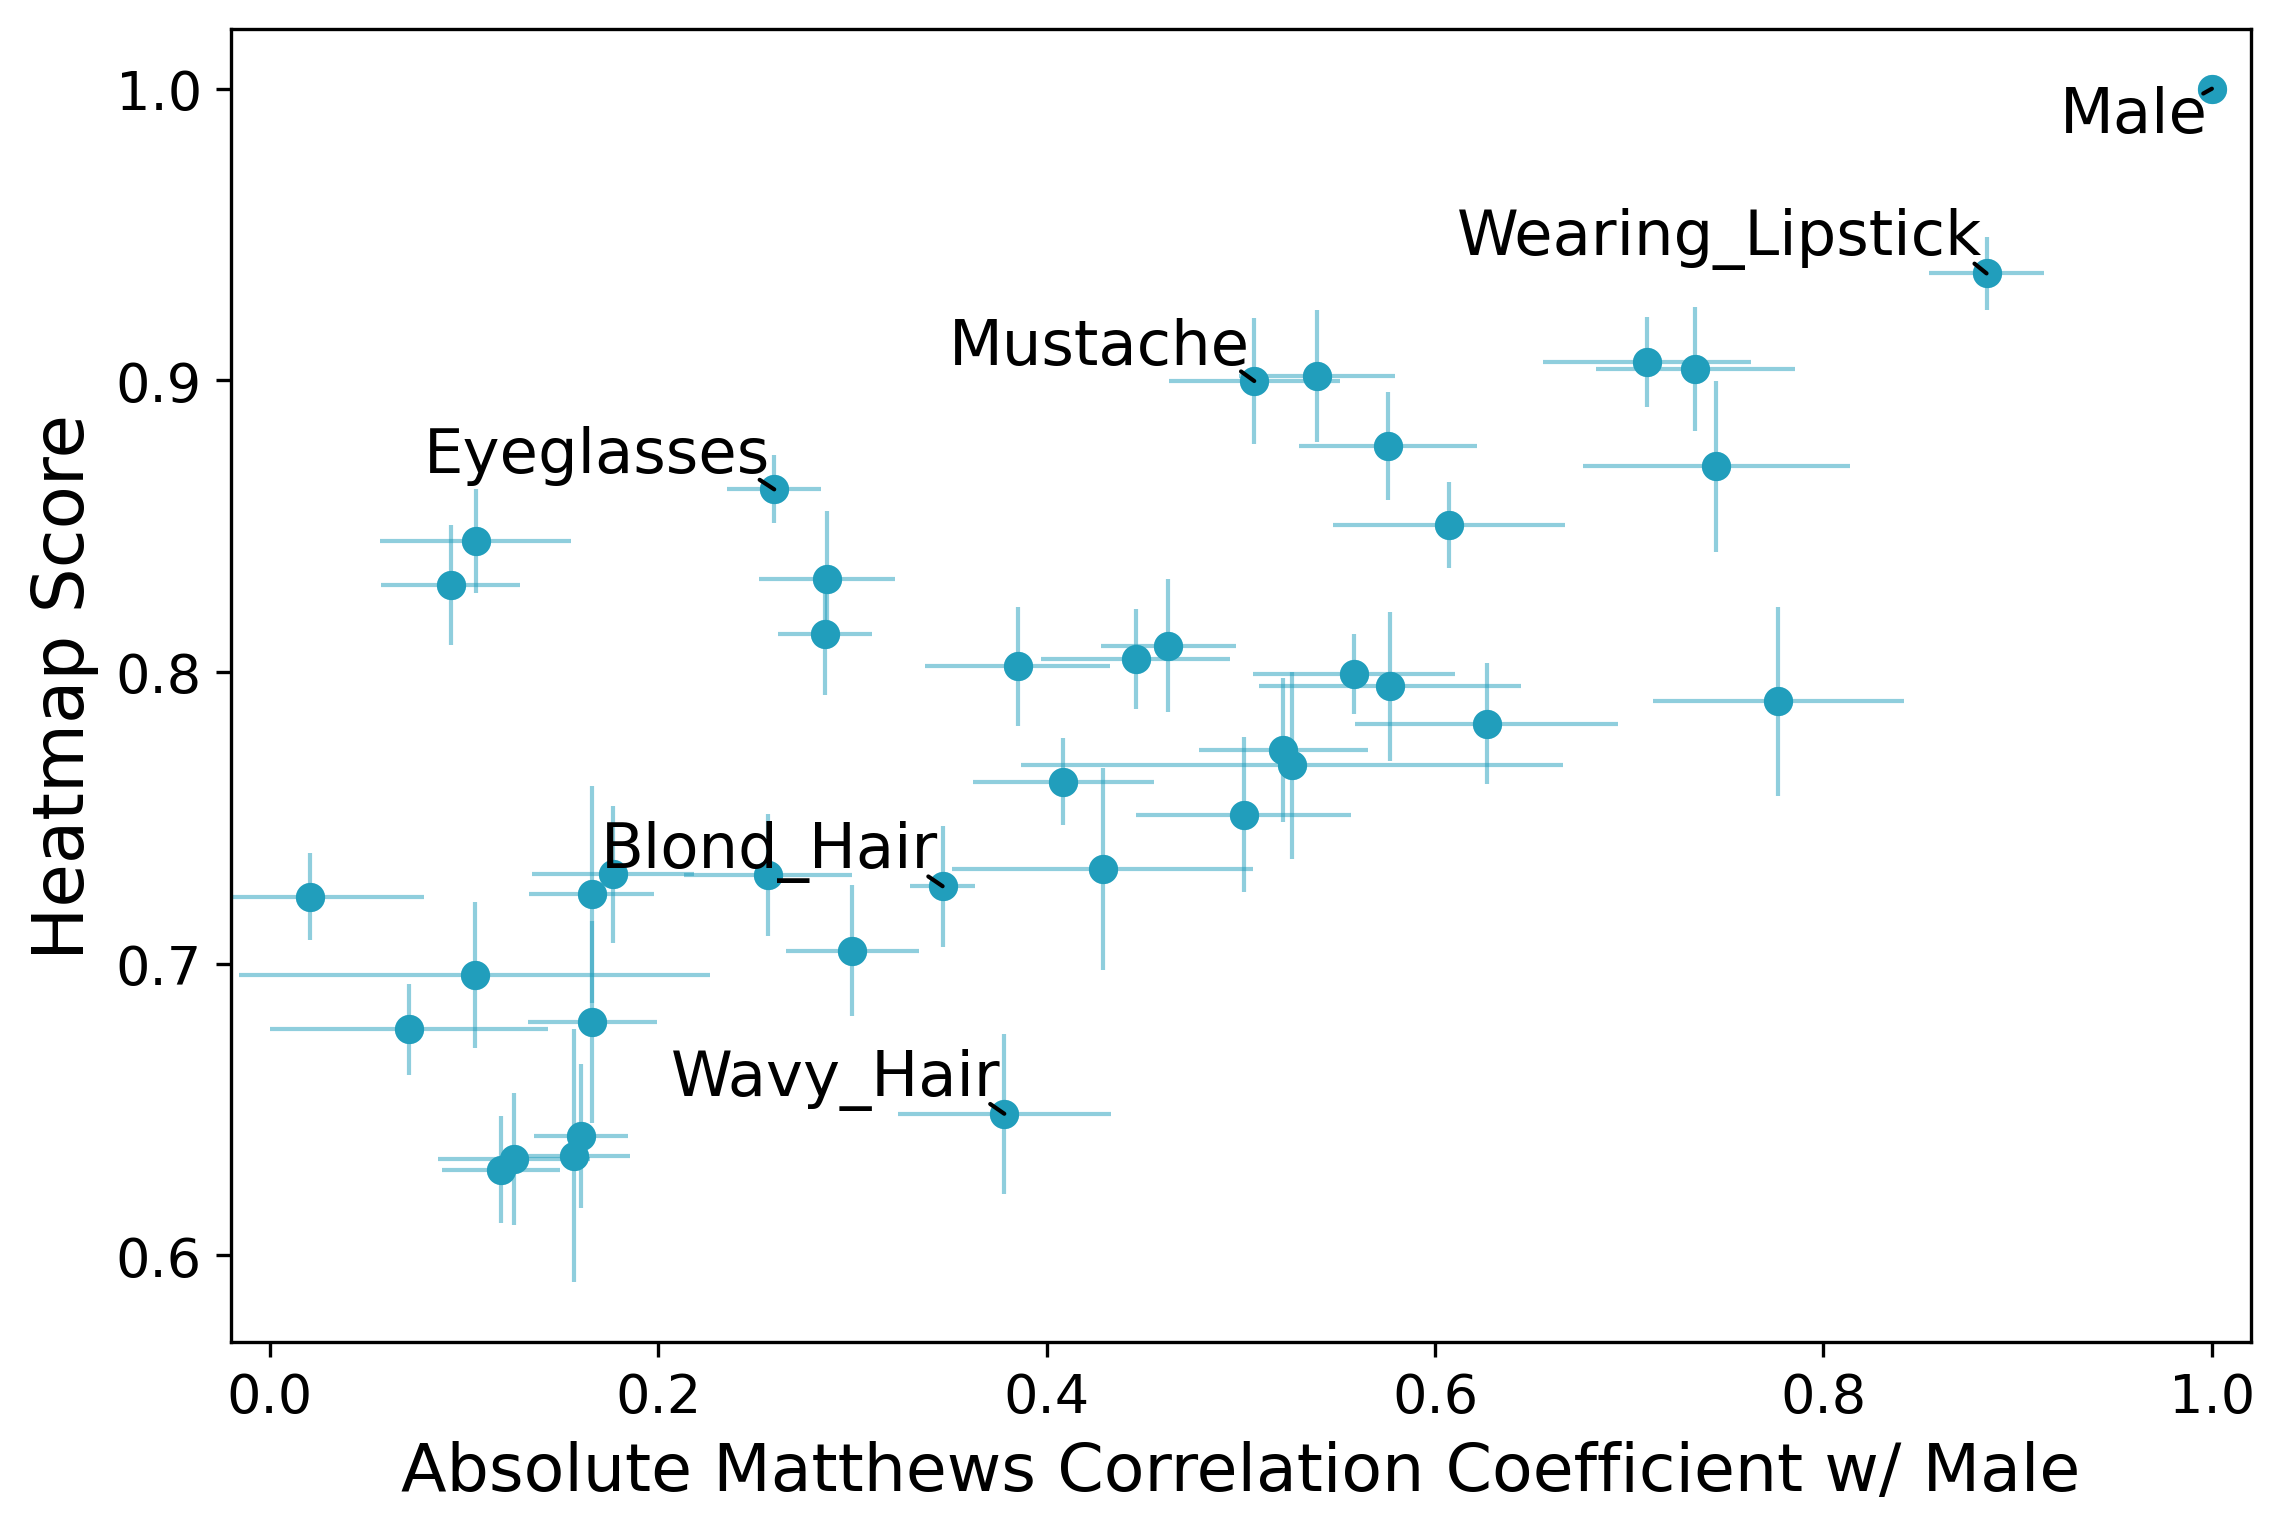

In [ ]:
scores = ("element_wise", "Element-wise")
plot_celeb_heatmap_scatter(CelebBase.LABEL_DICT.keys(), "Male", scores, True, model_target='all', results_dir = "results/heatmap/", figure_dir="figures/", attribution="GradCAM", averaged=True)

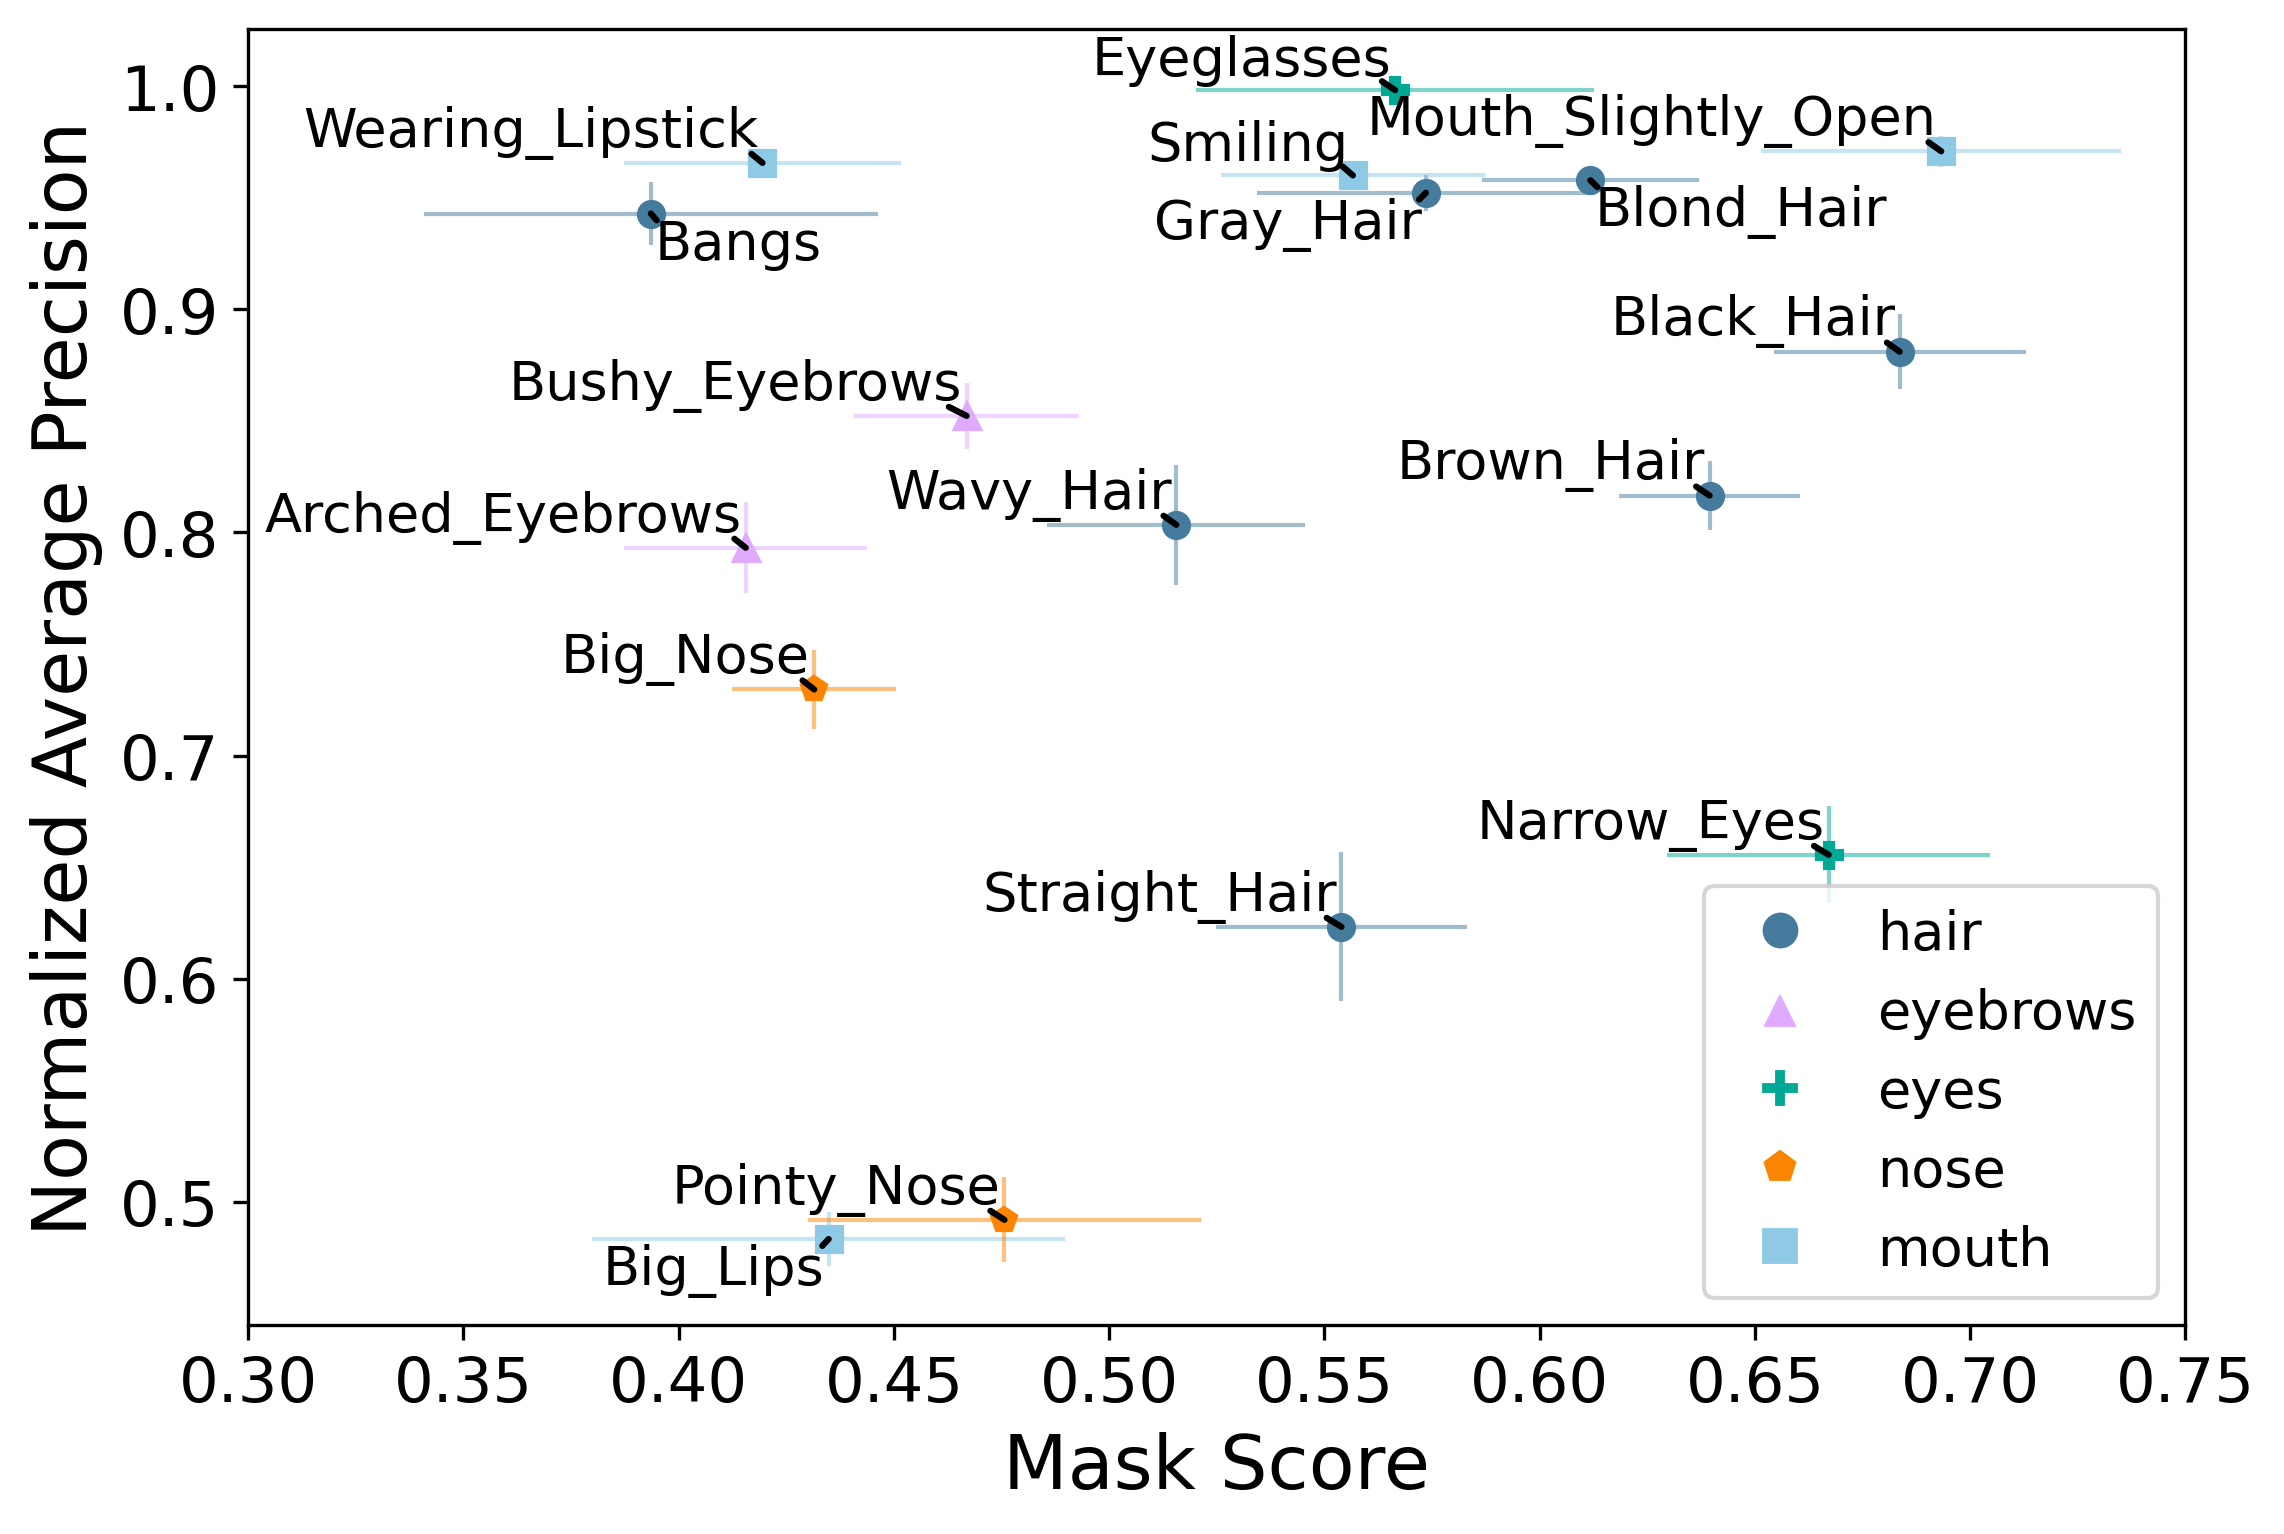

In [ ]:
score = "element_wise"
plot_celeb_mask_scatter(CelebBase.LABEL_DICT.keys(), "Male", score, True, accuracy_array=celeb_ap_normalized, model_target='all', results_dir = "results/mask/", figure_dir="figures/", attribution="GradCAM", averaged=True)

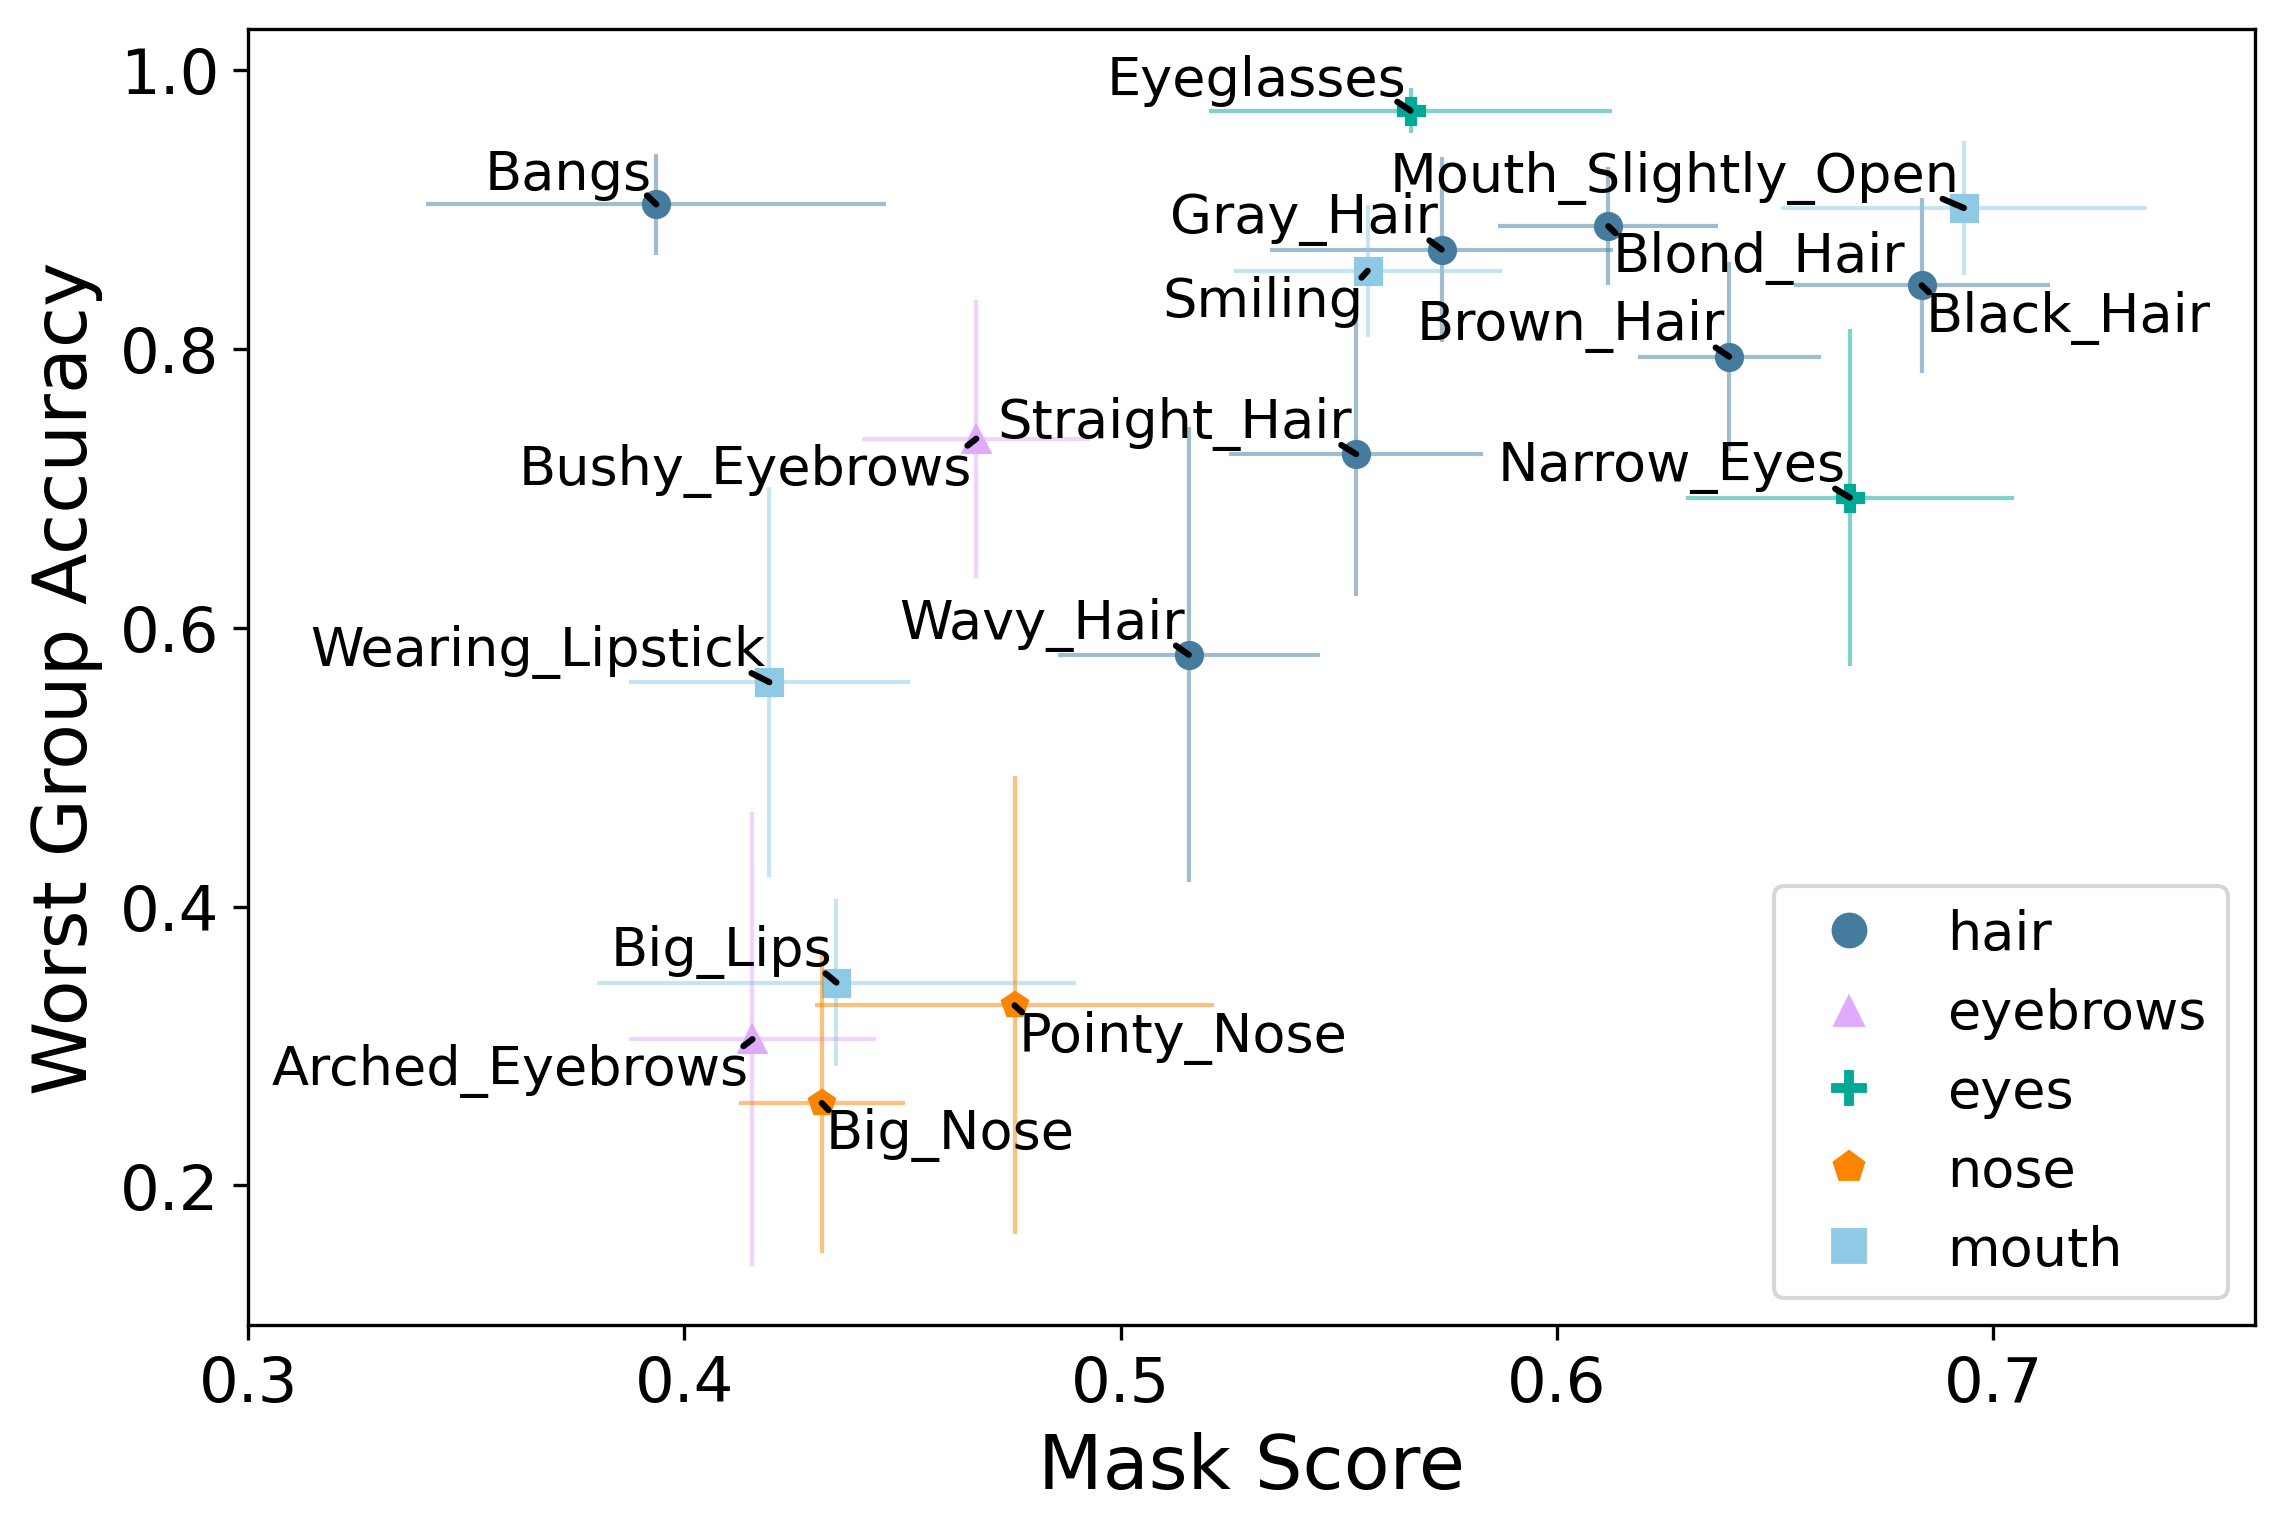

In [ ]:
score = "element_wise"
plot_celeb_mask_scatter(CelebBase.LABEL_DICT.keys(), "Male", score, True, accuracy_array=celeb_worst_group_accuracy, model_target='all', results_dir = "results/mask/", figure_dir="figures/", attribution="GradCAM", averaged=True)

/tmp/ipykernel_2210947/1137740169.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Male", "Blond\nHair  ", "Wavy\nHair  "], rotation=90, va="center", size=20)


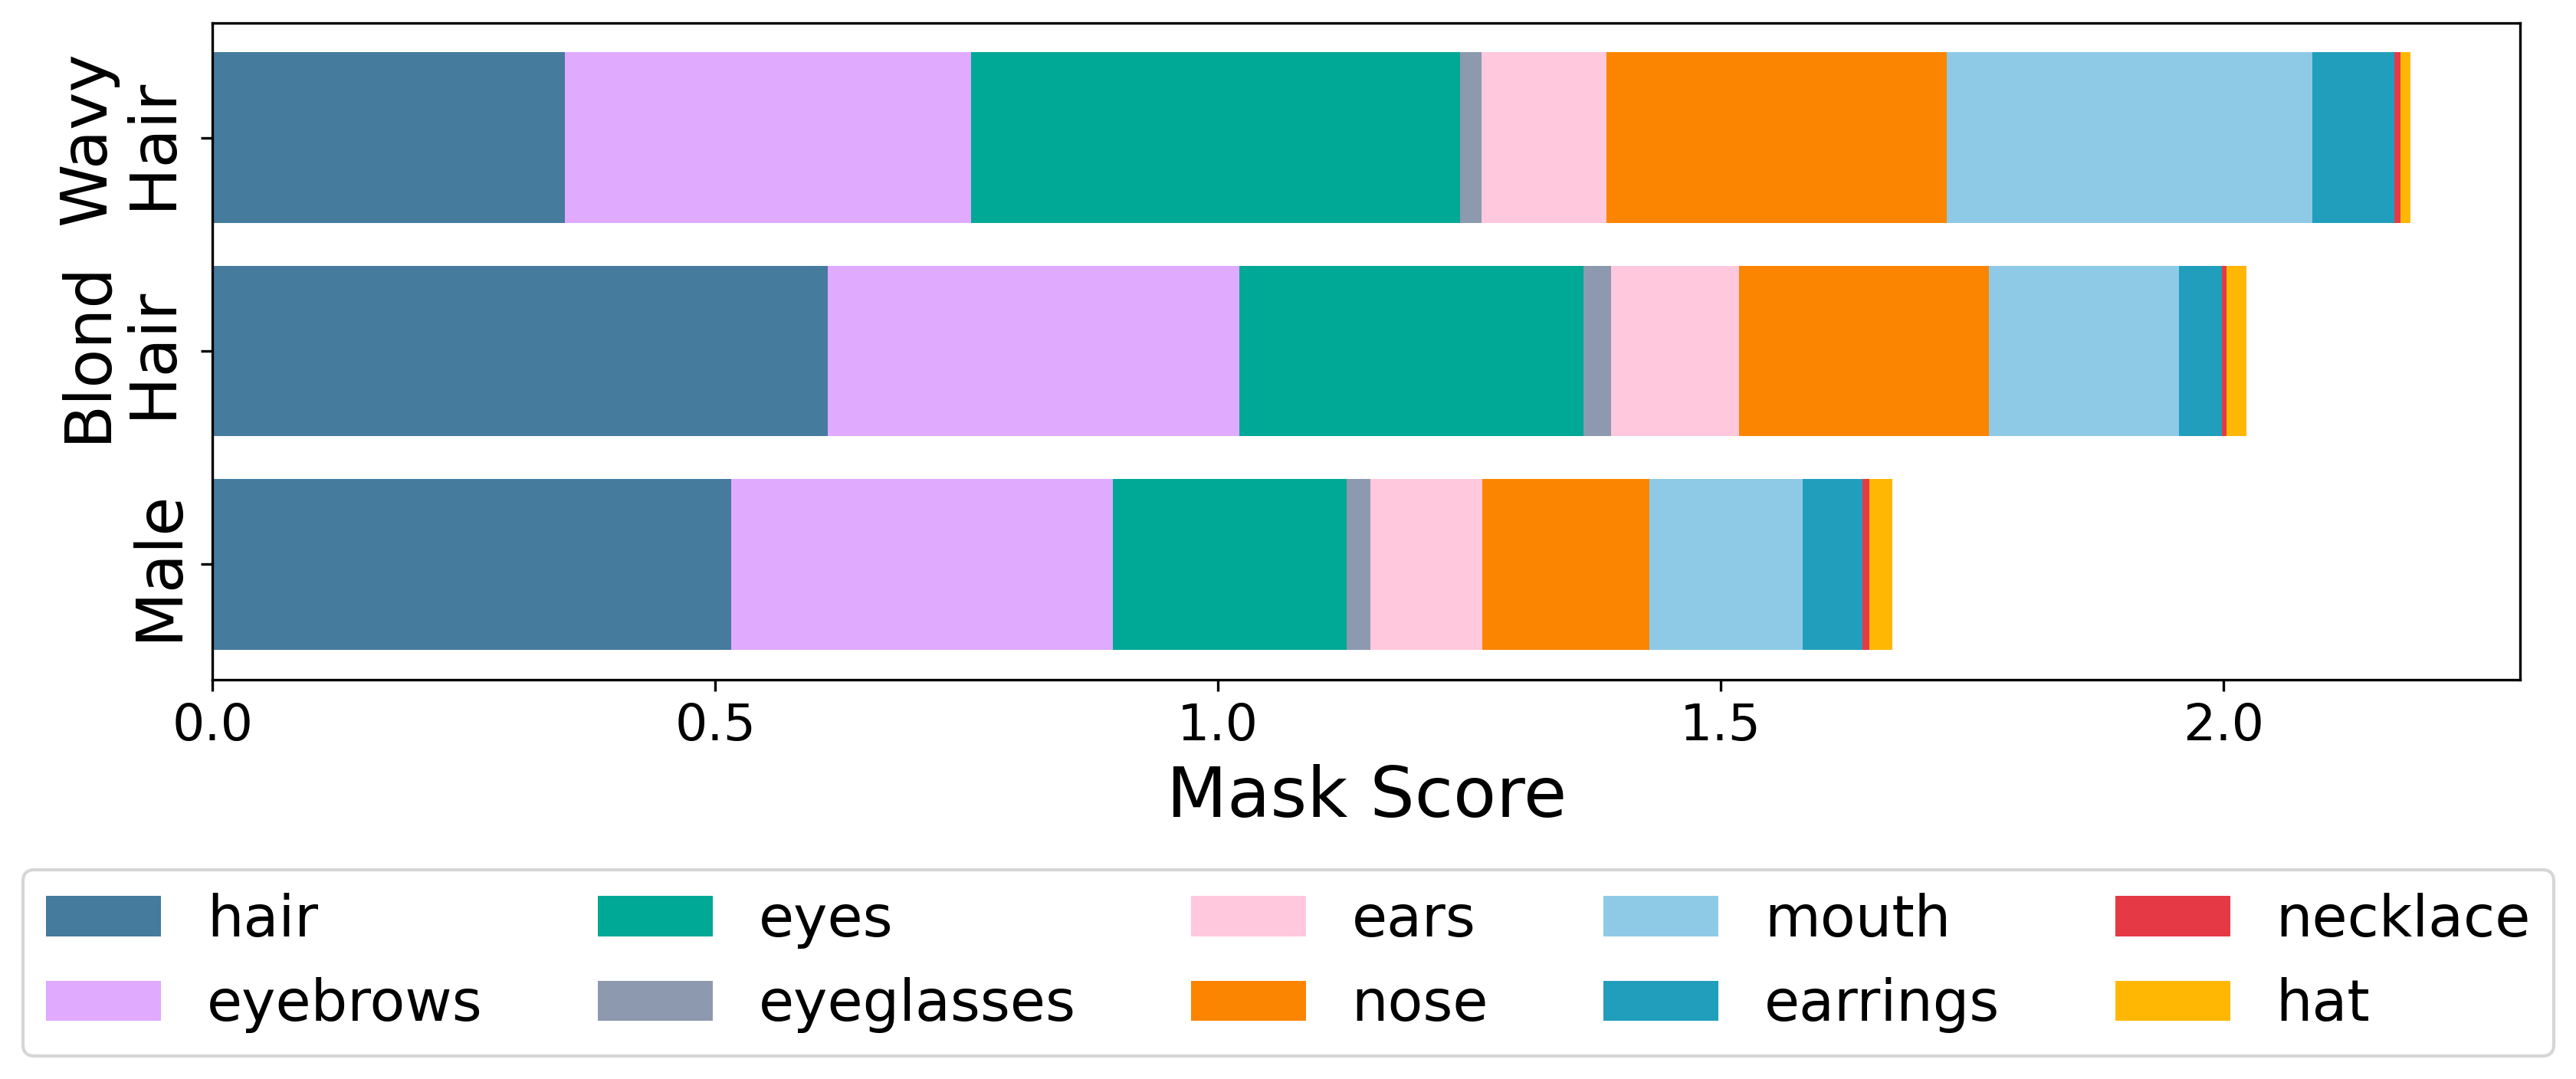

In [ ]:
scores = {"element_wise": "Element-wise"}
plot_celeb_teaser(["Male", "Blond_Hair", "Wavy_Hair"], "Male", scores, True, results_dir = "results/mask/", figure_dir="figures/", attribution="GradCAM", averaged=True)

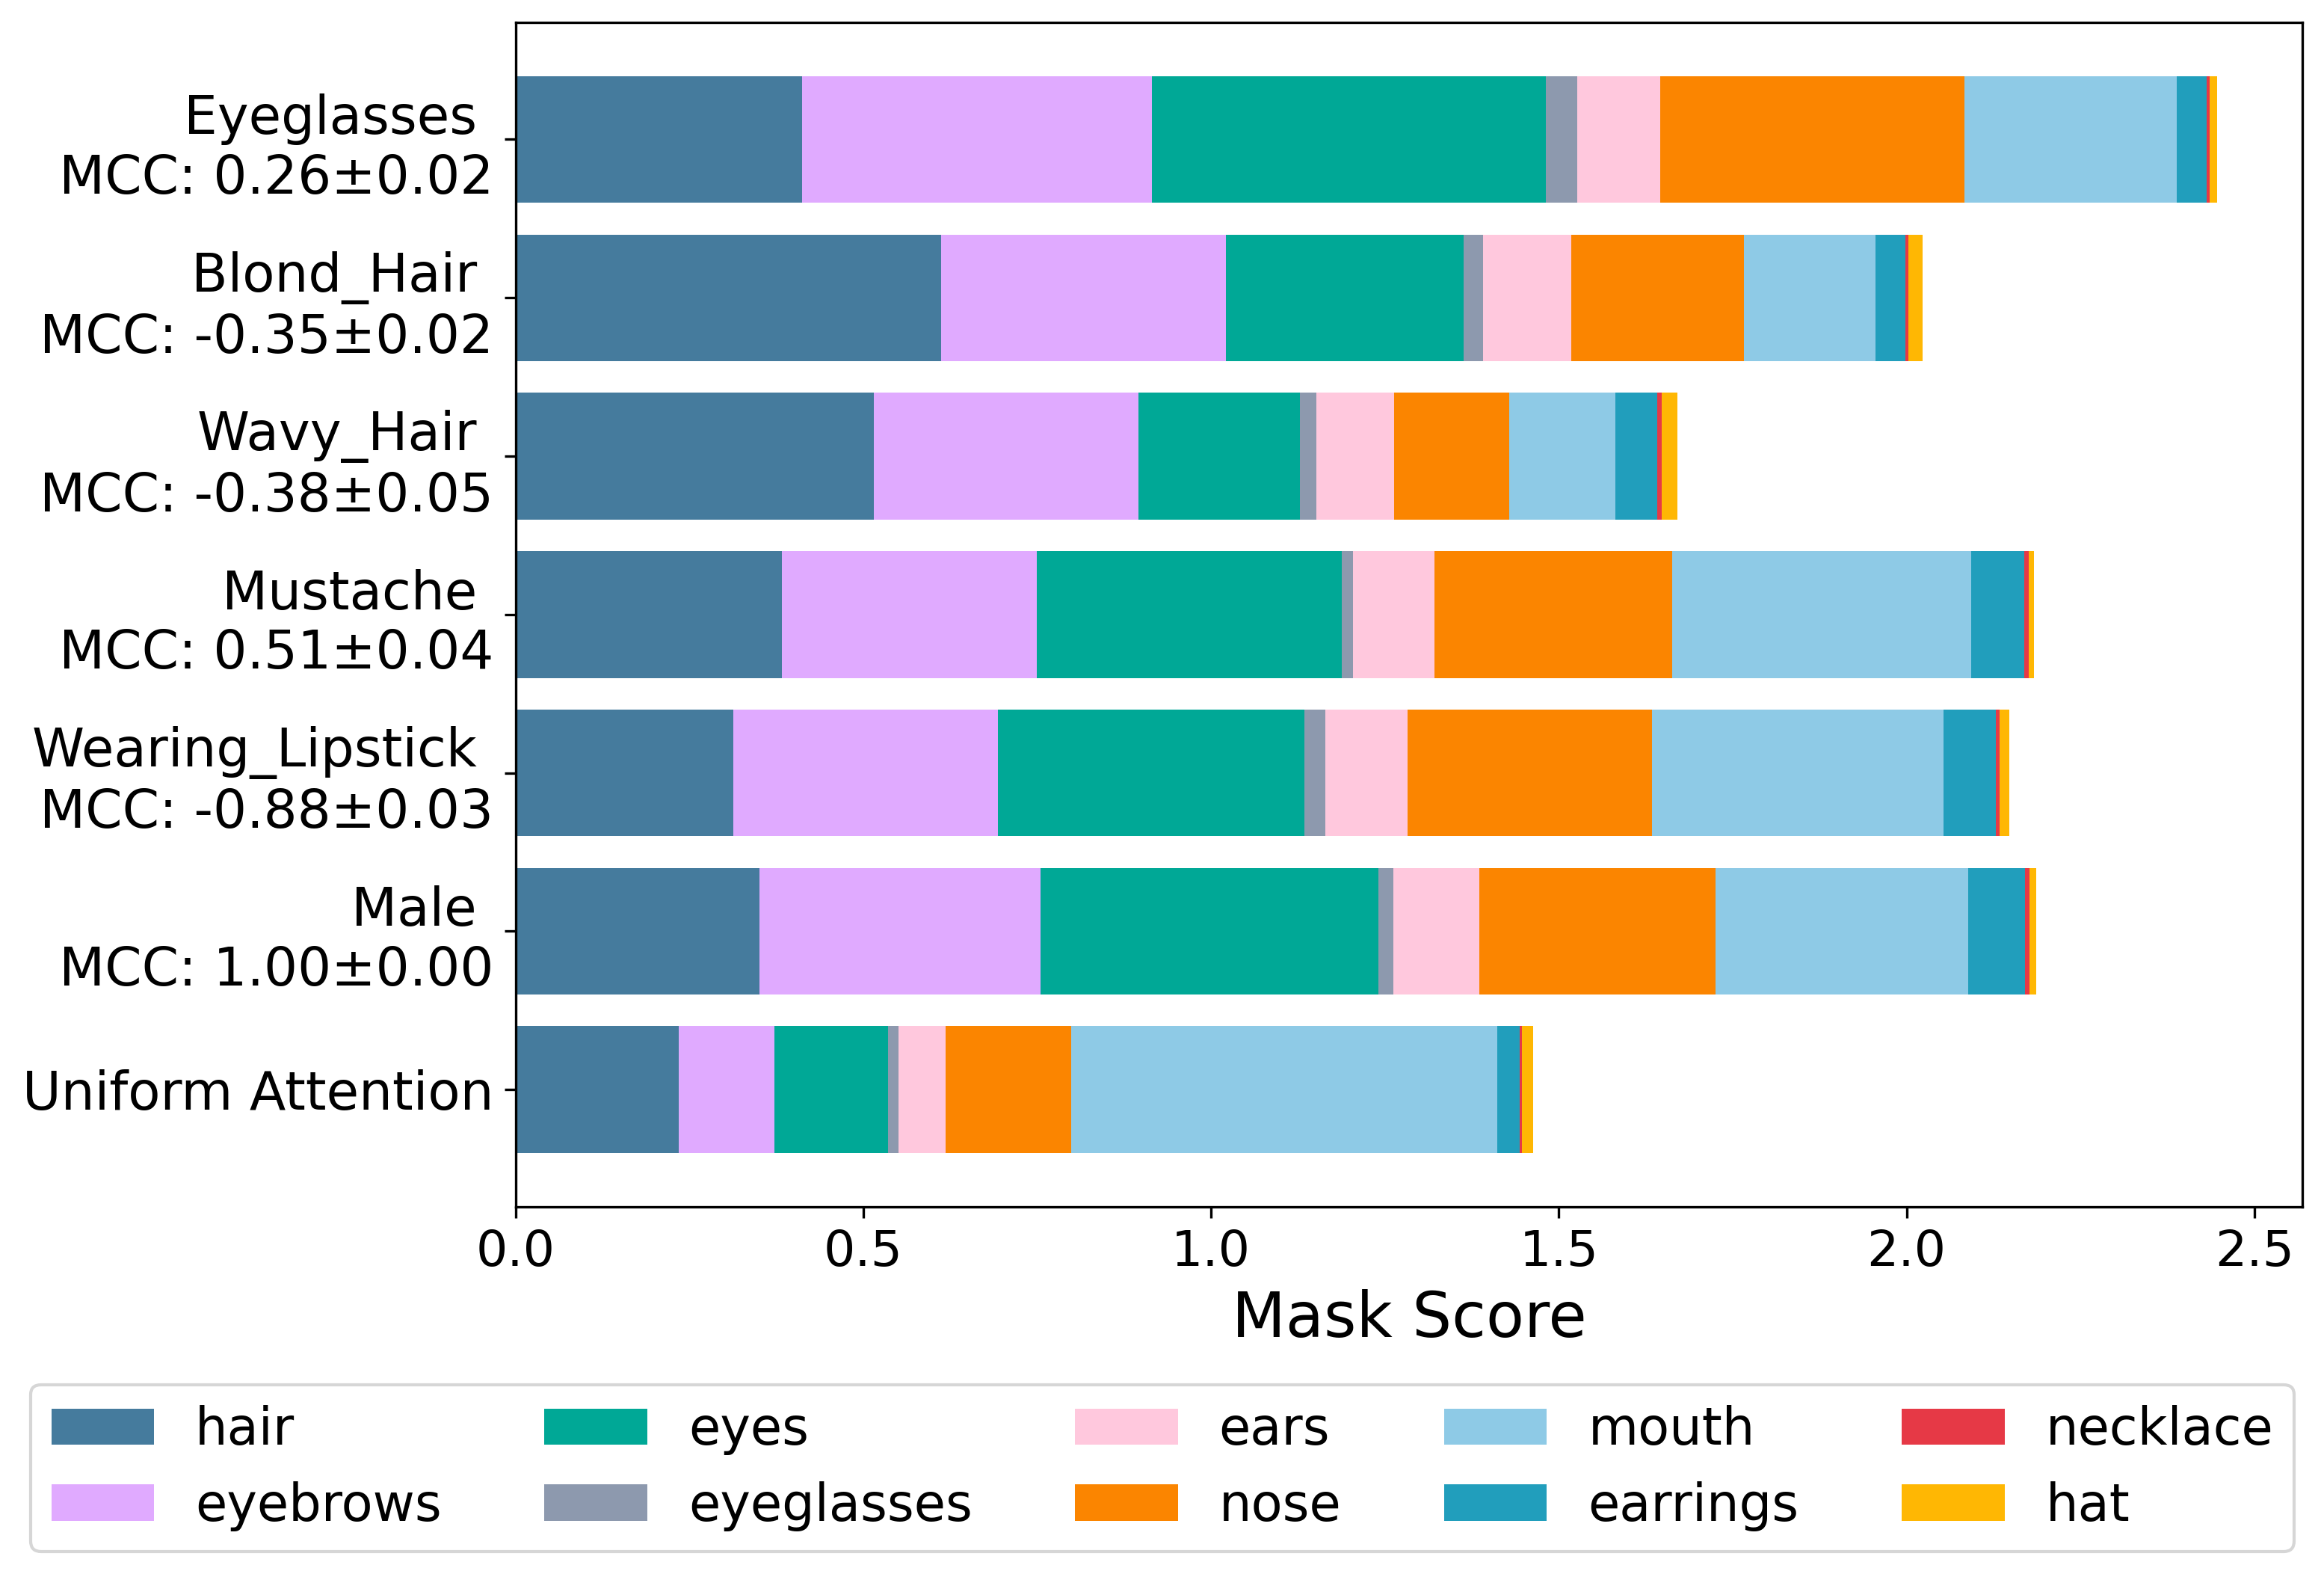

In [ ]:
scores = {"element_wise": "Element-wise"}
plot_celeb_masks(["Male", "Wearing_Lipstick", "Blond_Hair", "Wavy_Hair", "Mustache", "Eyeglasses"], "Male", scores, True, results_dir = "results/mask/", figure_dir="figures/", attribution="GradCAM", averaged=True)

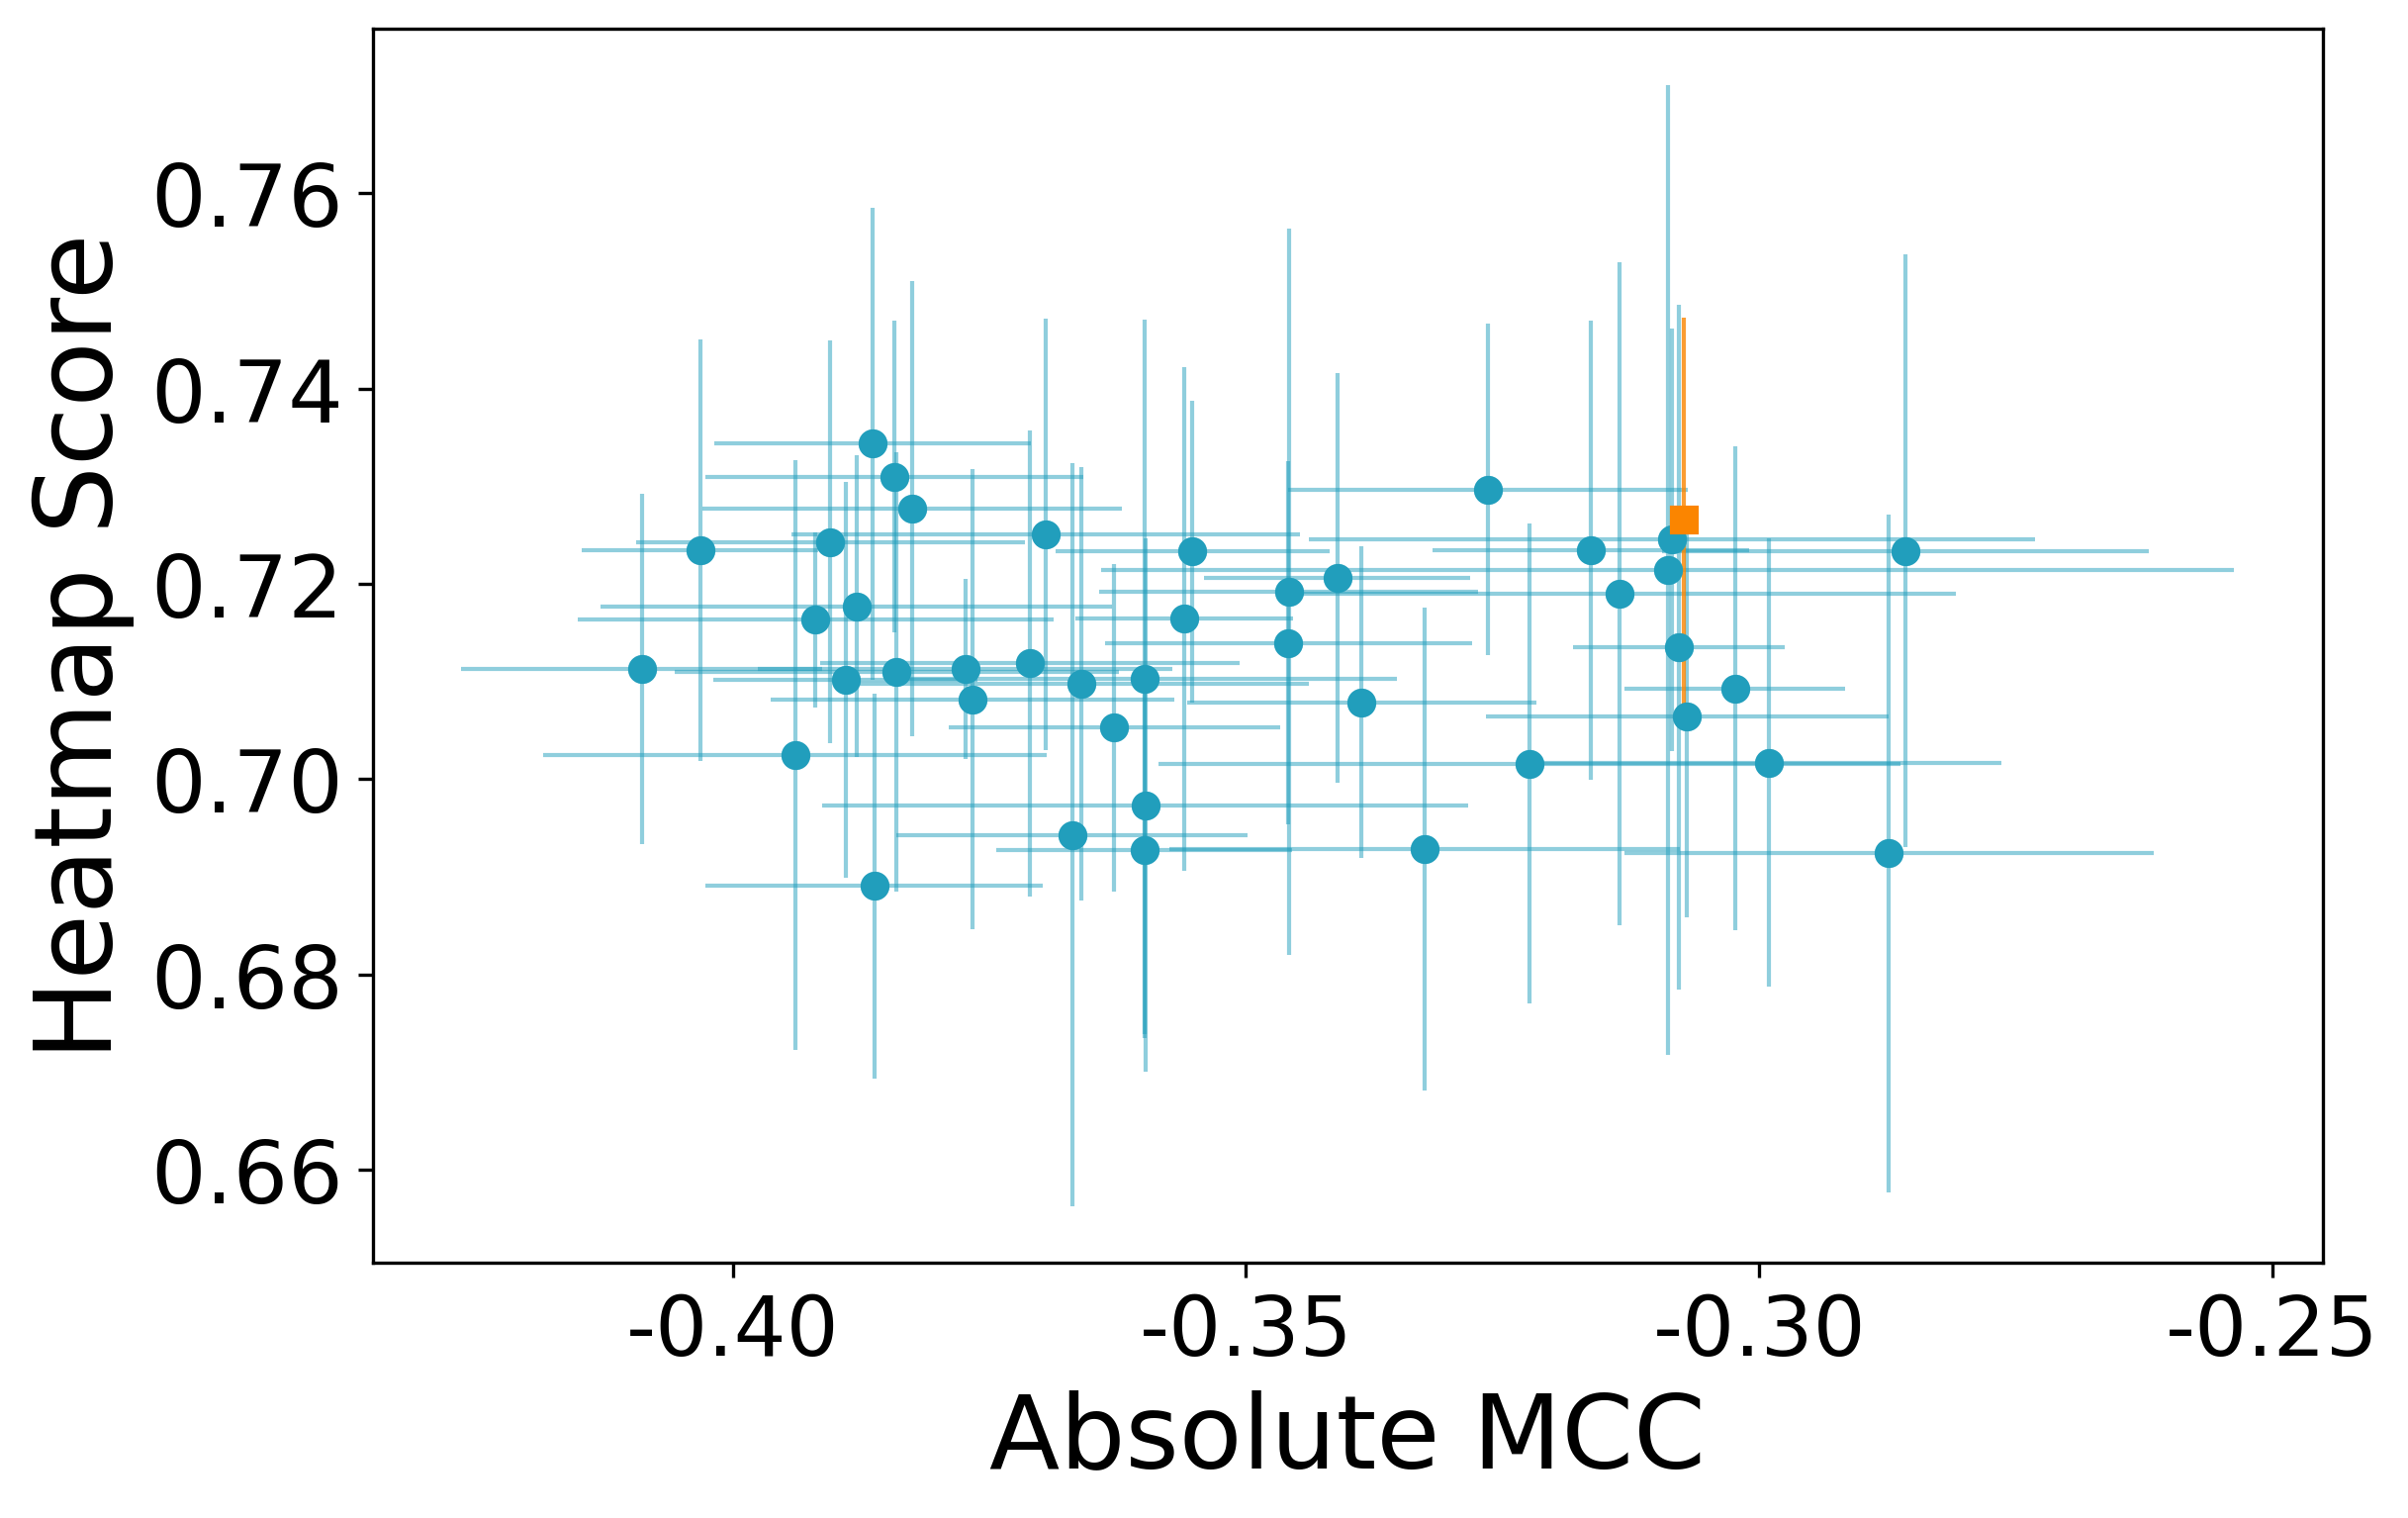

In [ ]:
scores = {"element_wise": "Element-wise", "element_abs": "Absolute Difference"}
plot_celeb_heatmap_subgroup(np.round(np.arange(-0.5, -0.09, 0.01), 2), "Blond_Hair", "Male", scores, True, model_target="all", subgrouping_labels=["Blond_Hair", "Male"], results_dir = "results/subgroups/", figure_dir="figures/", attribution="GradCAM", is_averaged=True)

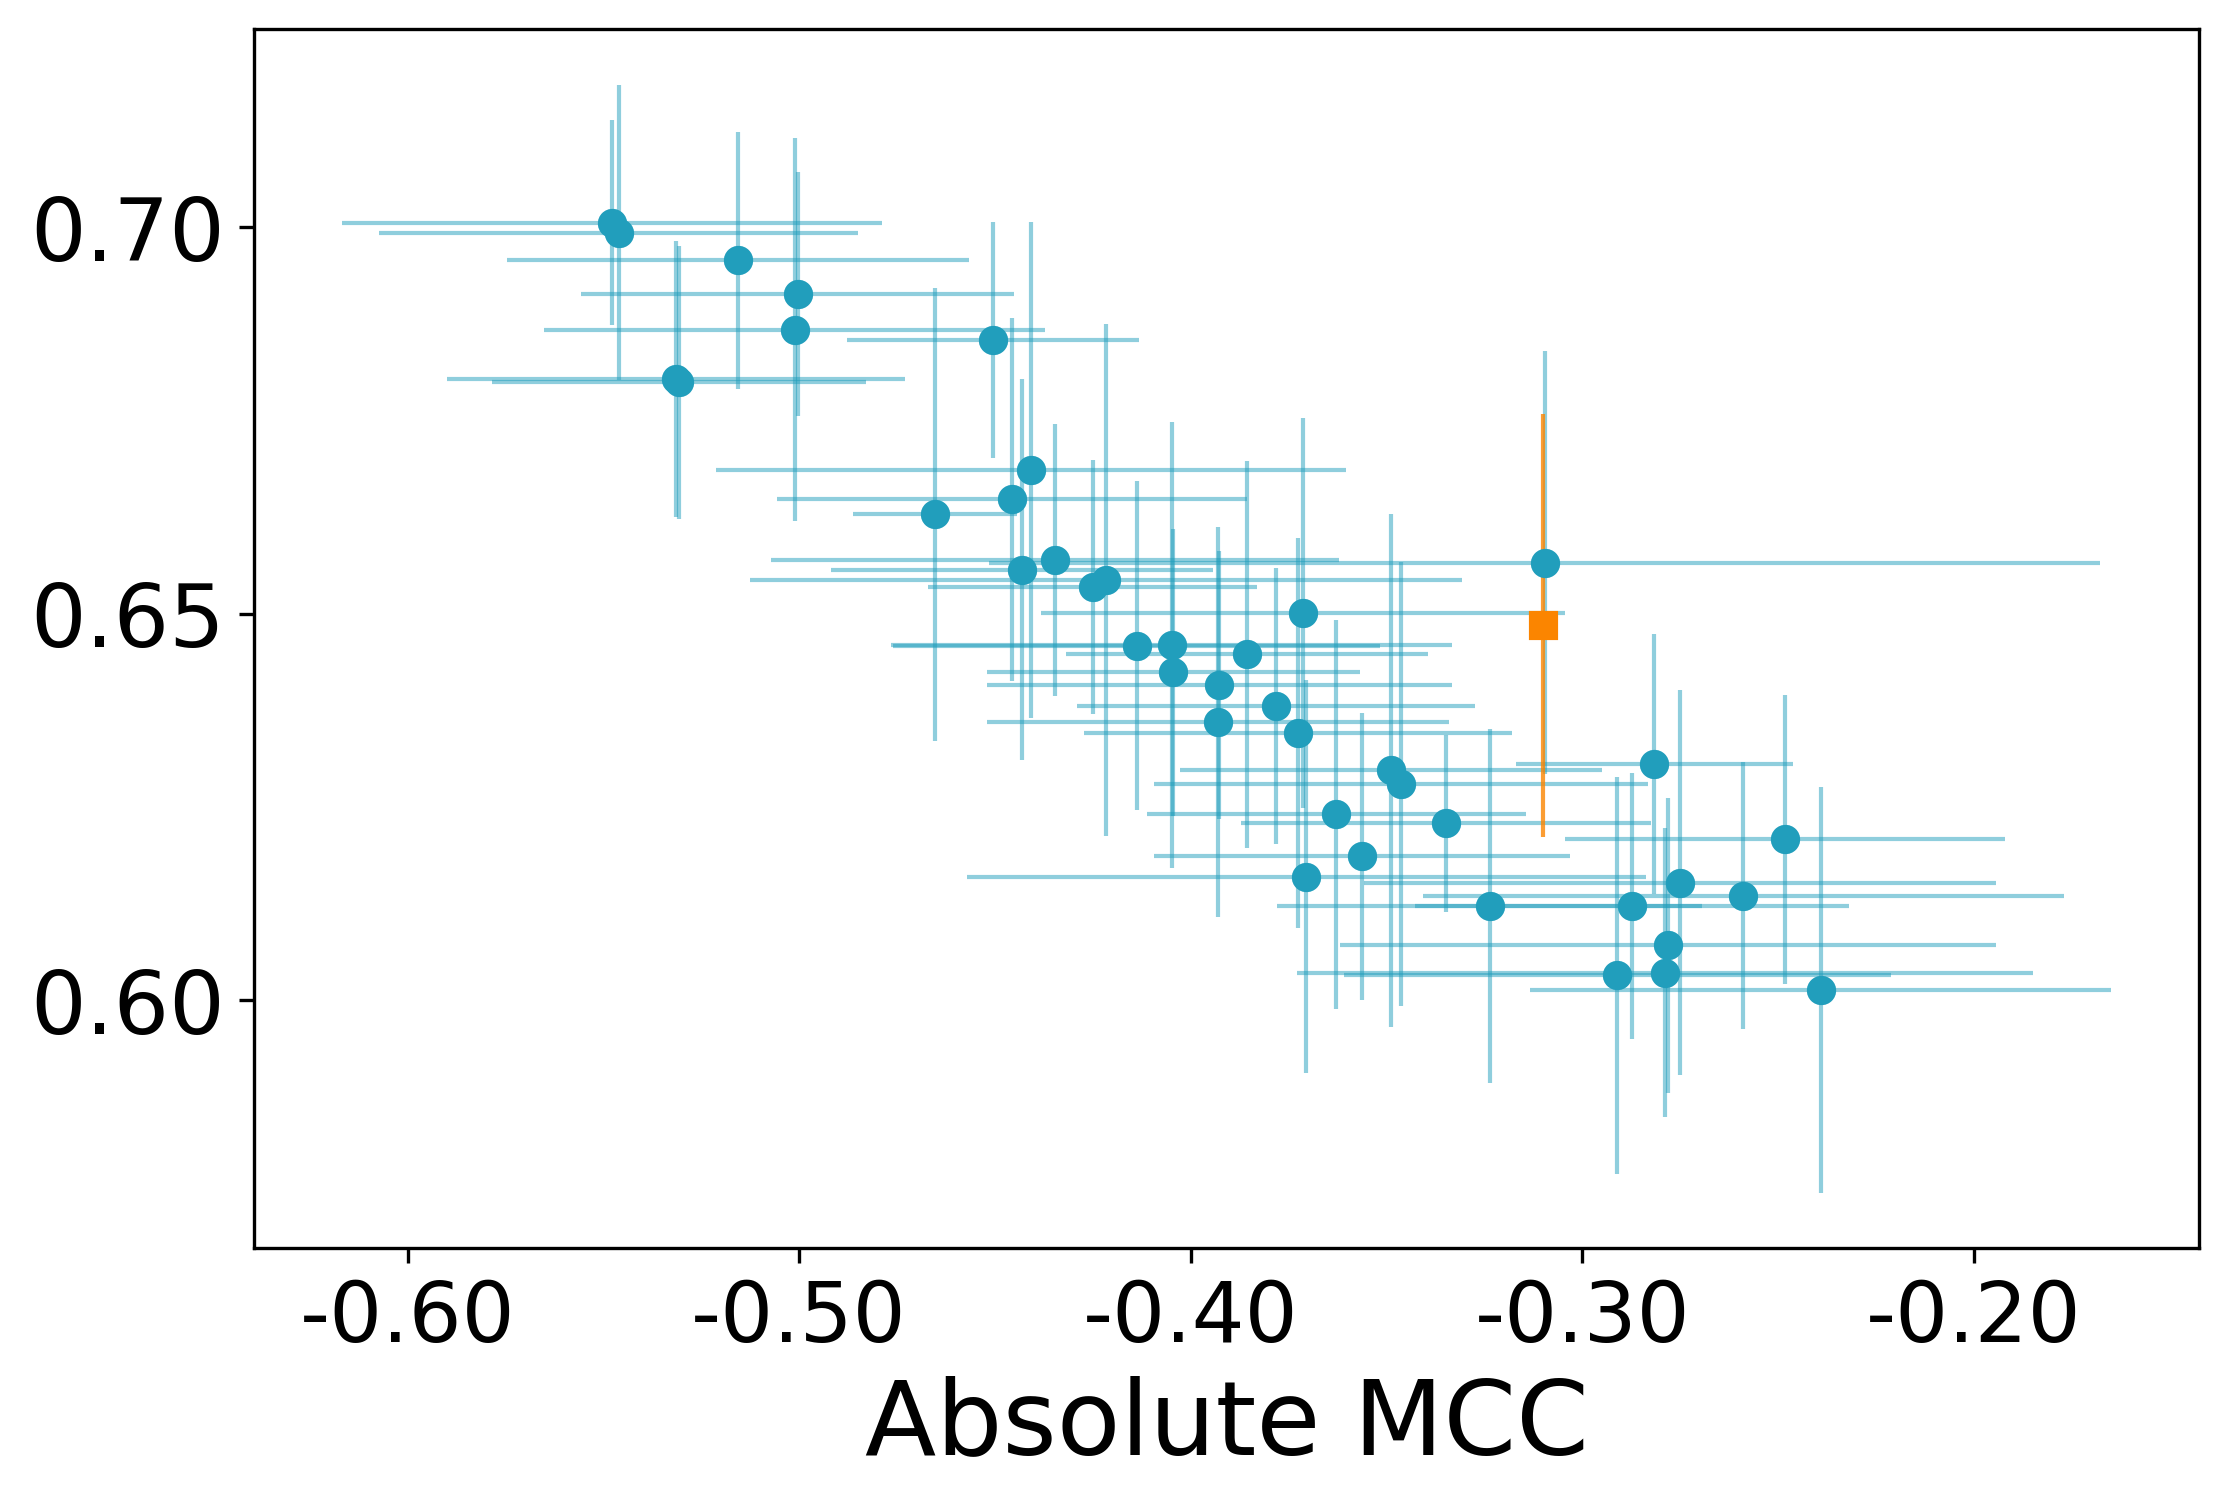

In [ ]:
scores = {"element_wise": "Element-wise", "element_abs": "Absolute Difference"}
plot_celeb_heatmap_subgroup(np.round(np.arange(-0.51, -0.11+.0001, 0.01), 2), "Wavy_Hair", "Male", scores, True, model_target="all", subgrouping_labels=["Wavy_Hair", "Male"], results_dir = "results/subgroups/", figure_dir="figures/", attribution="GradCAM", is_averaged=True)

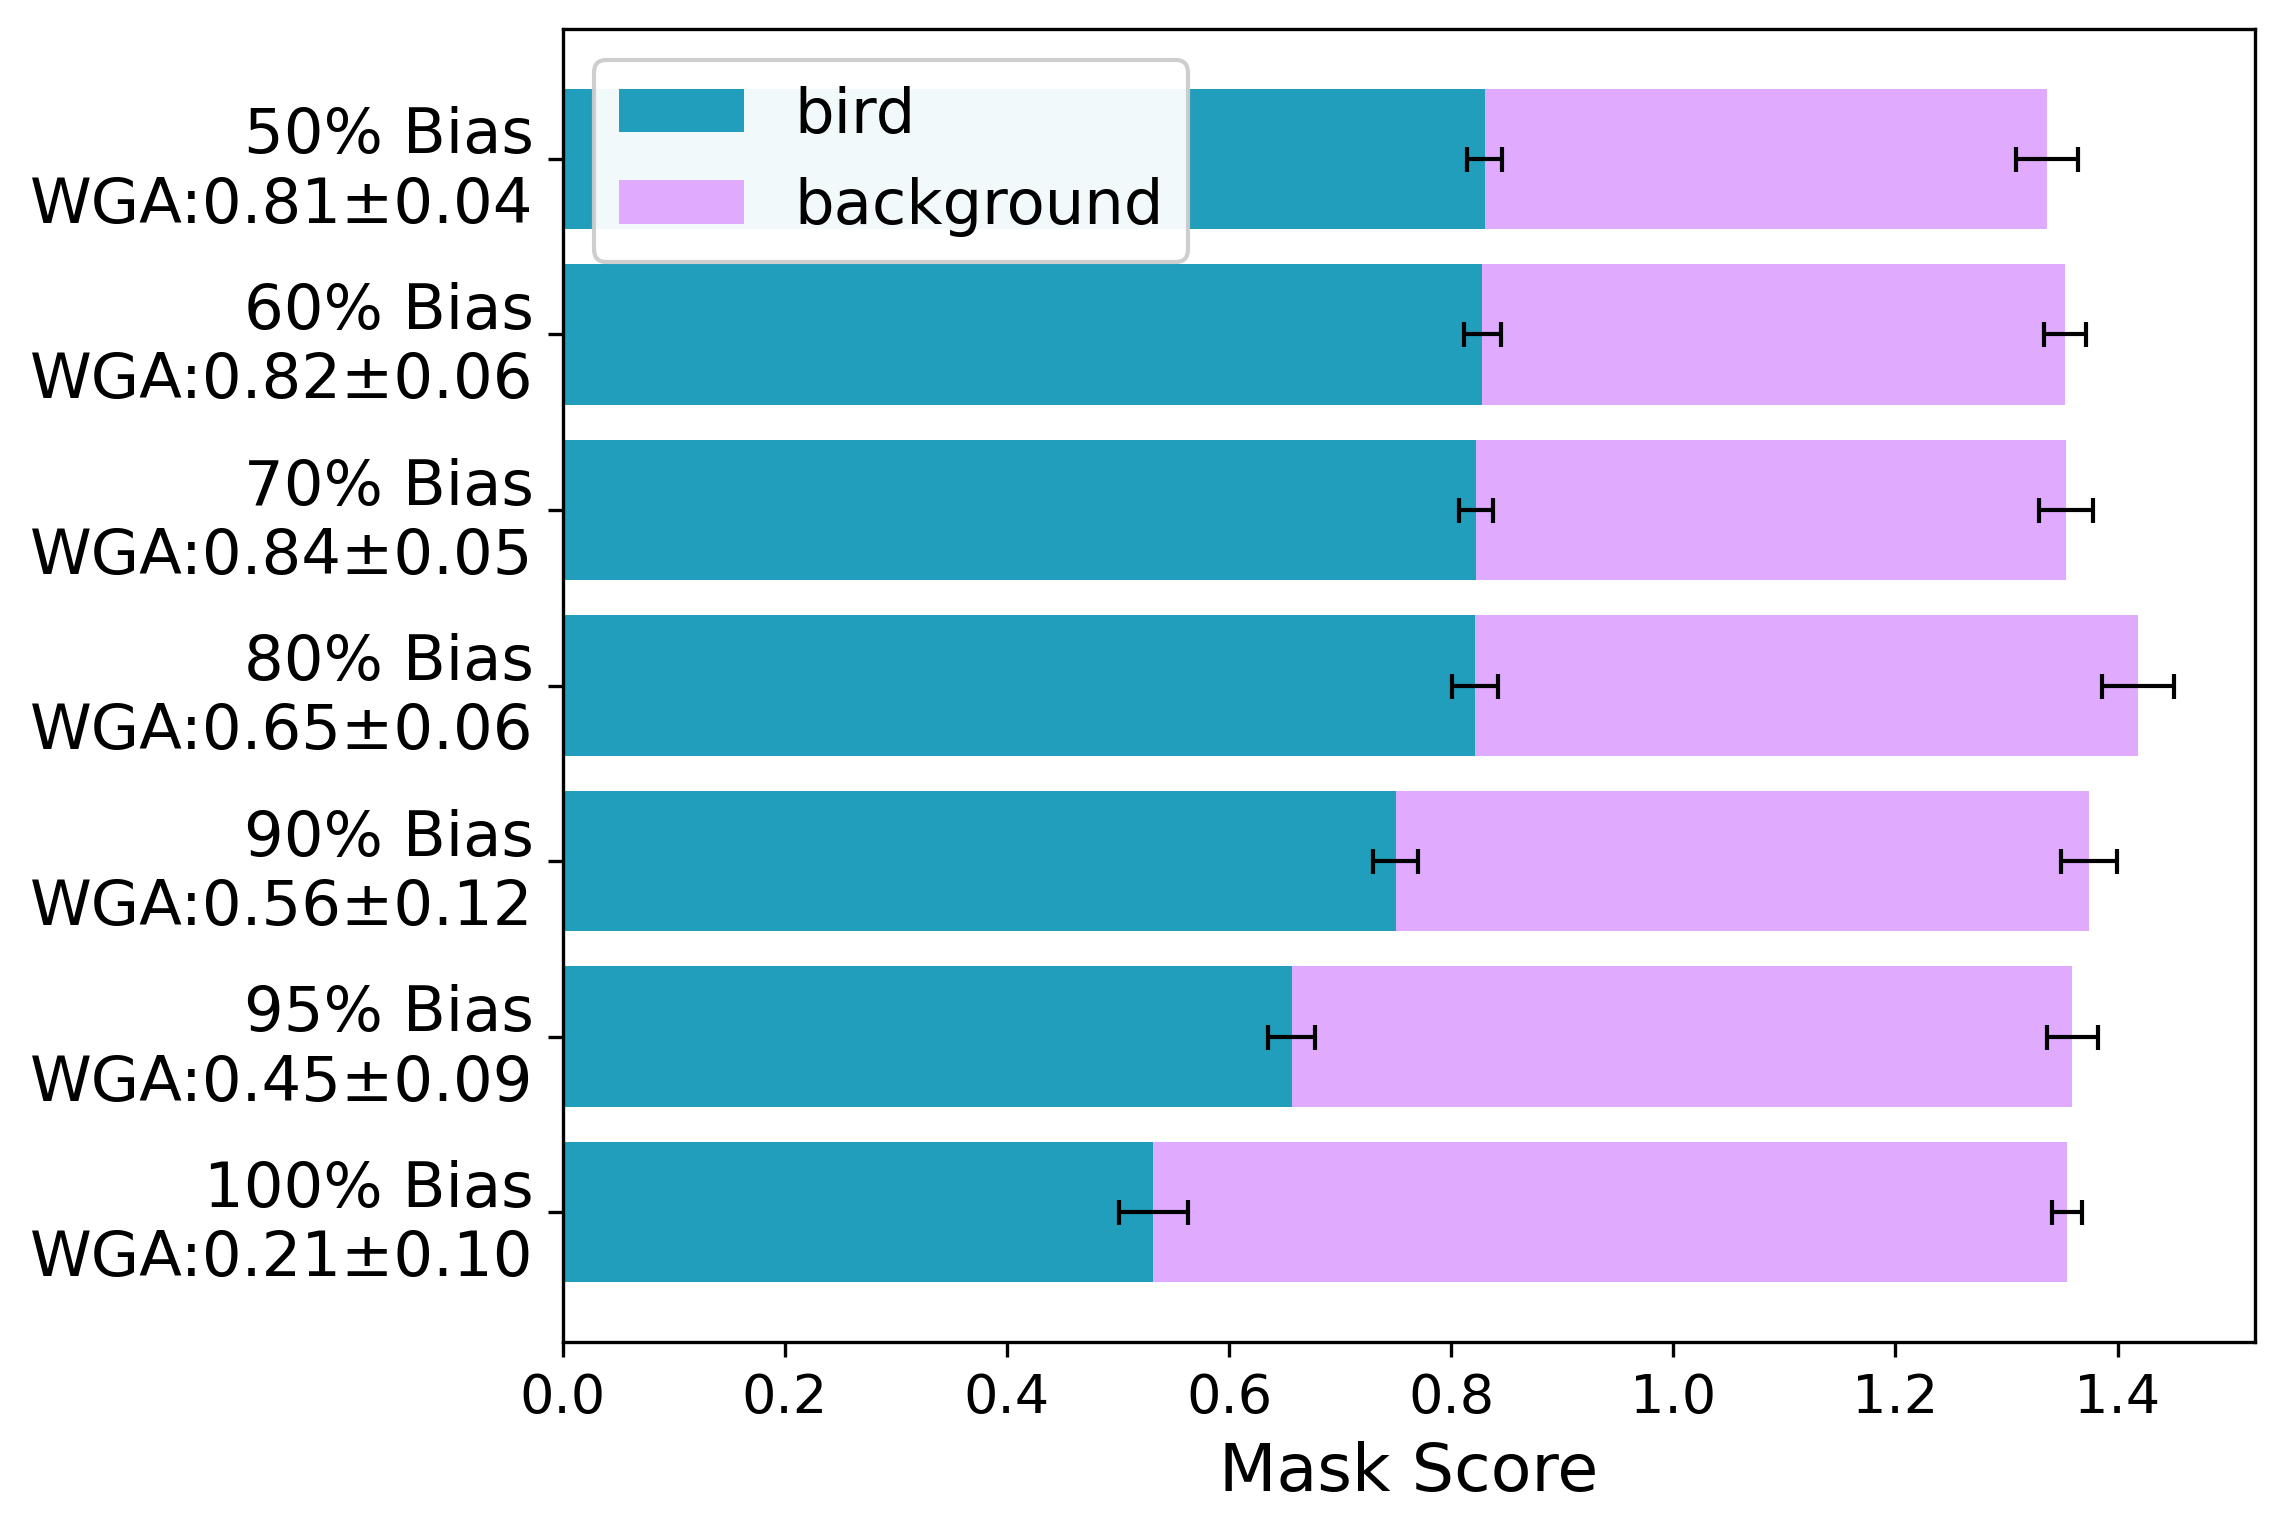

In [ ]:
percentages = ["50", "60", "70", "80", "90", "95", "100"]
plot_waterbirds_mask(percentages, True, results_dir="results/waterbirds_mask/", figure_dir="figures/")

Subsampling 14542 of 21000 images for training set with subgrouping.
Subgroup train MCC: -0.29996479673501575, Val MCC: -0.29754529105479655, Test MCC: -0.31433491502017263


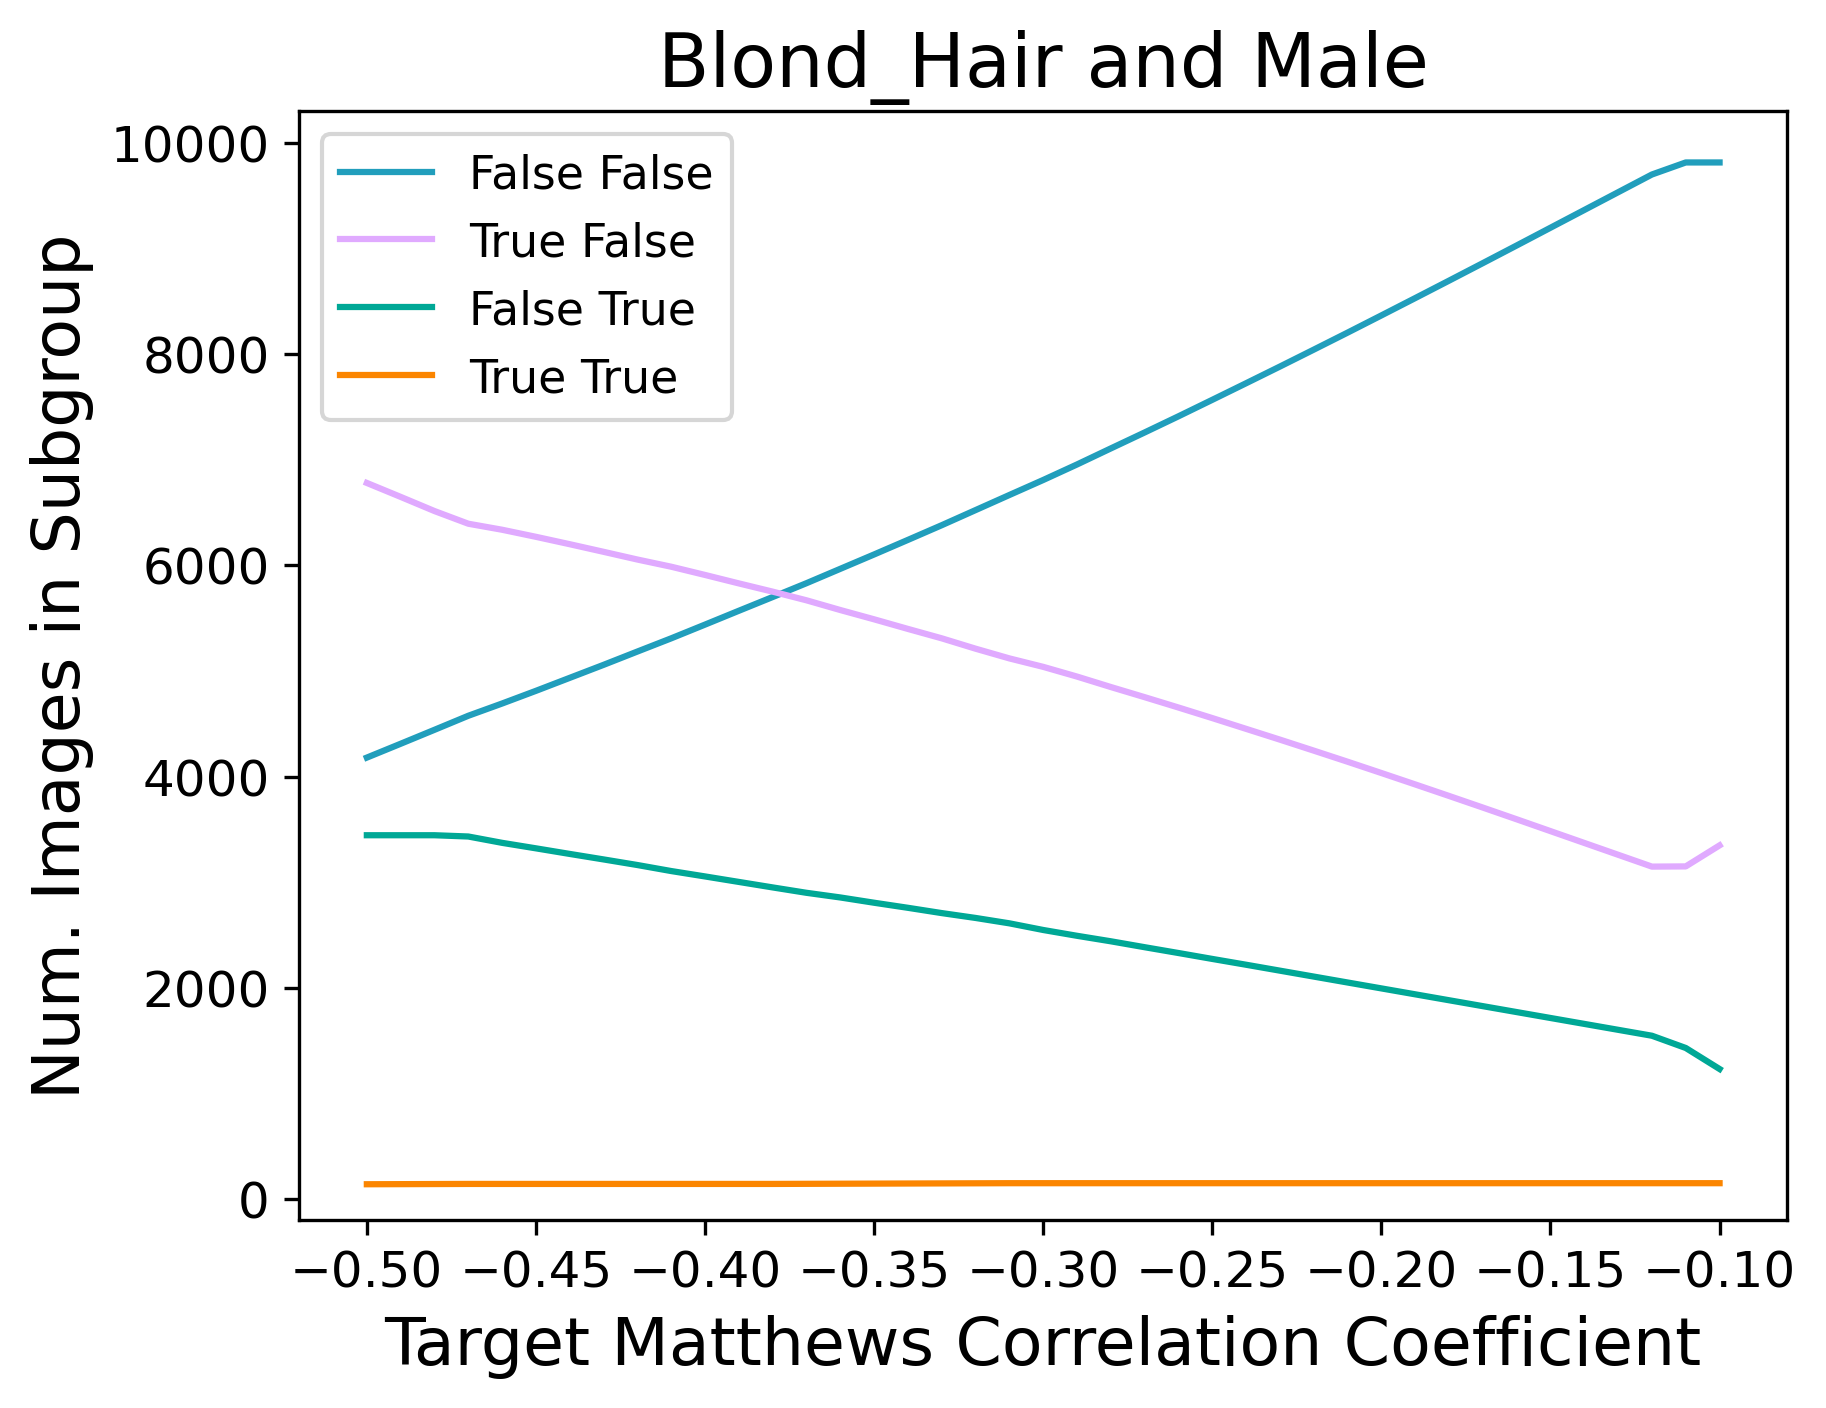

In [ ]:
dataset = CelebDataset(
            "datasets/CelebAMask-HQ/",
            224,
            augment_data=True,
            target_label=["Blond_Hair", "Male"],
            target_masks=["skin"],
            subgrouping_labels=["Blond_Hair", "Male"],
            target_mcc=-0.3,
            target_mcc_range=[-0.5, -0.1],
            seed = 2
        )

_, target_mccs1, subgroups1 = dataset.get_subgroups_smooth(-0.1, dataset.train_idx, dataset.set_size)
_, target_mccs2, subgroups2 = dataset.get_subgroups_smooth(-0.5, dataset.train_idx, dataset.set_size)

subgroups = subgroups2[::-1] + subgroups1
target_mccs = np.concatenate((target_mccs2[::-1], target_mccs1))
subgroups = np.transpose(np.vstack(subgroups))
plt.plot(target_mccs, subgroups[0], label='False False', c=colors[1])
plt.plot(target_mccs, subgroups[1], label='True False', c=colors[11])
plt.plot(target_mccs, subgroups[2], label='False True', c=colors[9])
plt.plot(target_mccs, subgroups[3], label='True True', c=colors[4])

plt.title("Blond_Hair and Male", fontsize=18)
plt.legend(loc="upper left", fontsize=11)
plt.xlabel("Target Matthews Correlation Coefficient", fontsize=16)
plt.ylabel("Num. Images in Subgroup", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(ymin=-200)
save_path = os.path.join(
        os.path.abspath("figures/"),
        "Celeb-subsample_Blond_Hair.pdf",
    )
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=150, bbox_inches="tight")
plt.show()

Subsampling 16061 of 21000 images for training set with subgrouping.
Subgroup train MCC: -0.3099745816382622, Val MCC: -0.3076536931243029, Test MCC: -0.31795841759459526


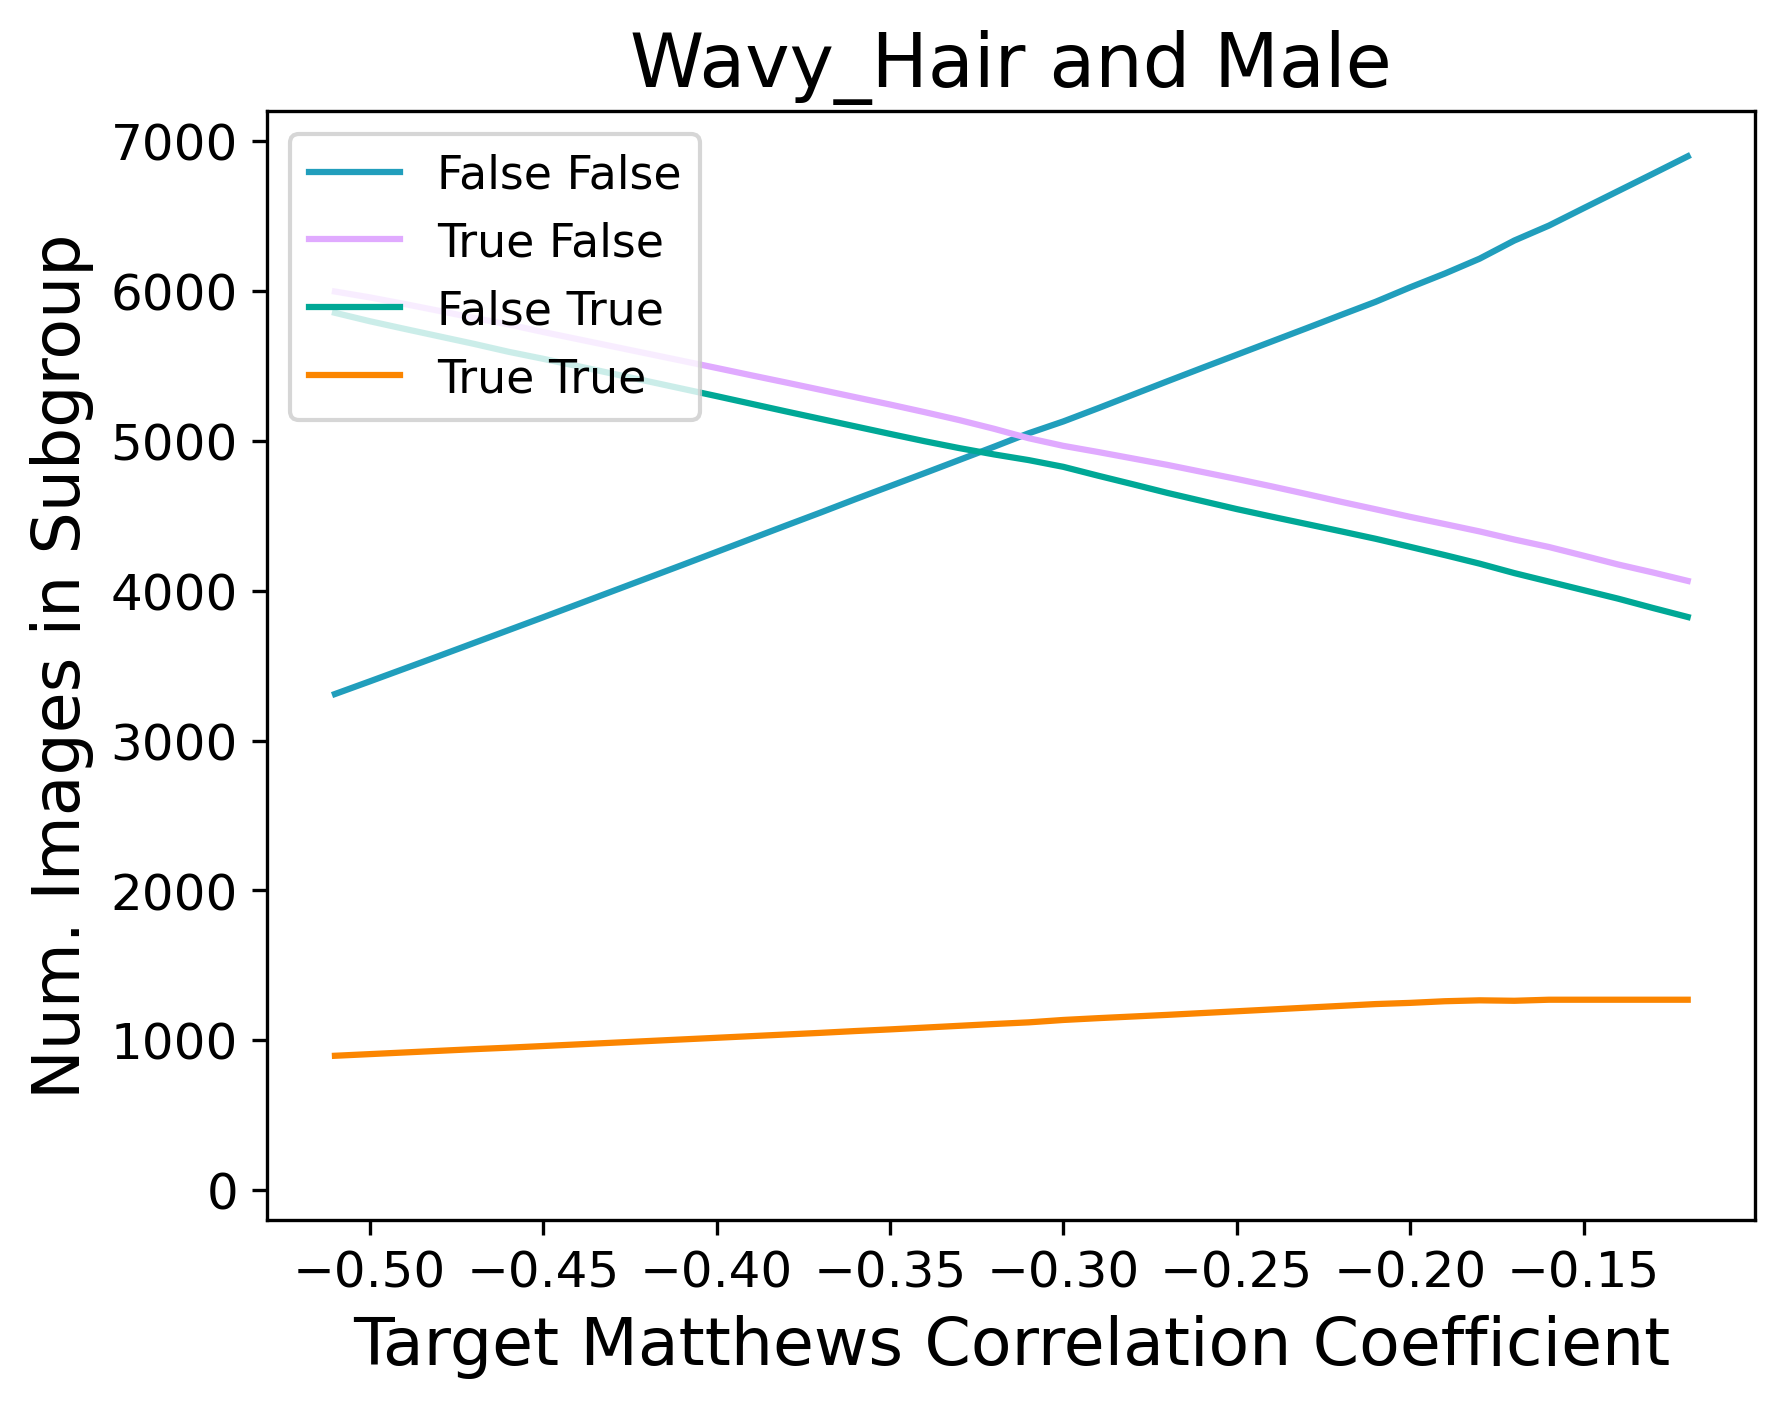

In [ ]:
dataset = CelebDataset(
            "datasets/CelebAMask-HQ/",
            224,
            augment_data=True,
            target_label="all",
            target_masks=["skin"],
            subgrouping_labels=["Wavy_Hair", "Male"],
            target_mcc=-0.31,
            target_mcc_range=[-0.51, -0.11],
            seed = 2
        )
_, target_mccs1, subgroups1 = dataset.get_subgroups_smooth(-0.51, dataset.train_idx, total=16061)
_, target_mccs2, subgroups2 = dataset.get_subgroups_smooth(-0.12, dataset.train_idx, total=16061)

subgroups = subgroups2[::-1] + subgroups1
target_mccs = np.concatenate((target_mccs2[::-1], target_mccs1))
subgroups = np.transpose(np.vstack(subgroups))
plt.plot(target_mccs, subgroups[0], label='False False', c=colors[1])
plt.plot(target_mccs, subgroups[1], label='True False', c=colors[11])
plt.plot(target_mccs, subgroups[2], label='False True', c=colors[9])
plt.plot(target_mccs, subgroups[3], label='True True', c=colors[4])

plt.title("Wavy_Hair and Male", fontsize=18)
plt.legend(loc="upper left", fontsize=11)
plt.xlabel("Target Matthews Correlation Coefficient", fontsize=16)
plt.ylabel("Num. Images in Subgroup", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(ymin=-200)
save_path = os.path.join(
        os.path.abspath("figures/"),
        "Celeb-subsample_Wavy_Hair.pdf",
    )
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=150, bbox_inches="tight")
plt.show()

In [ ]:
inconsistently_labeled = ["Big_Lips", "Big_Nose", "Oval_Face", "Pale_Skin", "Straight_Hair", "Wavy_Hair"]
gender_dependent = ["Arched_Eyebrows", "Attractive", "Bushy_Eyebrows", "Pointy_Nose", "Receding_Hair", "Young"]
gender_independent = ["Bangs", "Black_Hair", "Brown_Hair", "Chubby", "Bags_Under_Eyes", "Eyeglasses", "Gray_Hair", "High_Cheekbones", "Mouth_Sightly_Open", "Smiling", "Wearing_Earrings", "Wearing_Hat"]

annotate = ["Male", "Wearing_Lipstick", "Mustache", "Wavy_Hair", "Blond_Hair", "Eyeglasses"]

def plot_celeb_heatmap_rebuttal(
    targets: list[str],
    confounder_label: str,
    score,
    normalize_scores,
    model_target,
    fig_size=5,
    correlations=None,
    correlation_score=matthews_corrcoef,
    correlations_name=None,
    results_dir="results/",
    figure_dir="figures/",
    attribution="GradCAM",
    true_true=False,
    averaged=False,
    one_sided=False,
    colormap=None,
    plot_ground_truth=False
):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=2 if plot_ground_truth else 1,
        figsize=(fig_size * 1.5, fig_size),
        constrained_layout=True,
    )
    ground_truth_correlations = [get_correlation(target, confounder_label, correlation_score) for target in targets]
    ground_truth_correlations, targets = zip(*sorted(zip(ground_truth_correlations, targets)))

    cmap = mpl.colormaps['magma']
    color_categories = []
    for target in targets:
        if target in inconsistently_labeled:
            color_categories.append('tab:blue')
        elif target in gender_dependent:
            color_categories.append('tab:orange')
        elif target in gender_independent:
            color_categories.append(colors[11])
        else:
            color_categories.append('tab:red')
    categories_legend = [mpl.lines.Line2D([0], [0], color='w', marker='o', label='EfficientNetV2-S', markersize=8, markerfacecolor="#e57a00"),
                         mpl.lines.Line2D([0], [0], color='w', marker='o', label='ResNet-50', markersize=8, markerfacecolor="#afdeea")]
            
    for i, results_dir in enumerate(["results/heatmap/", "model_results/efficientnet/"]):
        data = ([], [])
        predicted_correlations = ([], [])
        one_sided_correlations = ([], [])

        for target in targets:
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Heatmap-{model_target}_{target}_{confounder_label}_{attribution}_{score[0]}{"_normalized" if normalize_scores else ""}{"_averaged" if averaged else ""}_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",")
            if i == 1:
                evaluations_path = os.path.join(
                'model_results/efficientnet/',
                'evaluations/',
                f'evaluations-celeb_{model_target}_efficientnet_*.csv'
            )
            else:
                evaluations_path = os.path.join(
                'results/',
                'evaluations/',
                f'evaluations-celeb_{model_target}_resnet50_extended_*.csv'
            )
            predicted_correlation = get_correlation(target, confounder_label, correlation_score, evaluations_path=evaluations_path)
            one_sided = get_correlation(target, confounder_label, one_sided_correlation, evaluations_path=evaluations_path)
            predicted_correlations[0].append(predicted_correlation[0])
            predicted_correlations[1].append(predicted_correlation[1])
            one_sided_correlations[0].append(one_sided[0])
            one_sided_correlations[1].append(one_sided[1])
            if true_true:
                data[0].append(results[0])
                data[1].append(results[5])
            else:
                data[0].append(results[4])
                data[1].append(results[9])

        correlations = predicted_correlations
        
        for j, target in enumerate(targets):
            if colormap == "one sided":
                color = cmap(one_sided_correlations[0][j])
            elif colormap == "categories":
                color = color_categories[j]
            elif colormap == "ap":
                color = cmap(celeb_ap[0,j])
            else:
                if i == 1:
                    color = "#e57a00"
                else:
                    color = "#afdeea"
            ax.plot(correlations[0][j], data[0][j], marker='o' if i == 1 else '^', c=color)
            ax.errorbar(correlations[0][j], data[0][j], xerr=correlations[1][j], yerr=data[1][j], fmt="o", c=color, elinewidth=1, alpha=0.5, markersize=0)
            if target in annotate or colormap is not None:
                if i == 1:
                    if target in ["Male"]:
                        ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.85), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='top')
                    elif target in ["Wearing_Lipstick"]:
                        ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.985, 0.09), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='bottom')
                    else:
                        ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.09), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=13, horizontalalignment='right', verticalalignment='bottom')
                else:
                    if target in ["Male"]:
                        # ax.annotate(target, (correlations[0][j], data[0][j]), xytext=(-1, 1), arrowprops=dict(arrowstyle='-', relpos=(0.97, 0.85), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=15, horizontalalignment='right', verticalalignment='top')
                        continue
                    elif target in ["Wearing_Lipstick"]:
                        ax.annotate(target, (correlations[0][j]+0.001, data[0][j]-0.001), xytext=(0, 0), arrowprops=dict(arrowstyle='-', relpos=(0.005, 0.95), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=7.5, horizontalalignment='left', verticalalignment='top')
                    else:
                        ax.annotate(target, (correlations[0][j]+0.001, data[0][j]-0.001), xytext=(0, 0), arrowprops=dict(arrowstyle='-', relpos=(0.01, 0.95), shrinkA=0, shrinkB=0), textcoords='offset points', fontsize=10, horizontalalignment='left', verticalalignment='top')

    ax.set_xlabel('Absolute Matthews Correlation Coefficient w/ Male', fontsize=16)
    ax.set_ylabel('Heatmap Score', fontsize=17)
    # ax.set_title("CelebA Attribute-Male Heatmap Score", fontsize=16)

    ax.tick_params(axis='x', labelrotation=0, labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.set_xlim([-0.02, 1.02])

    ax.legend(handles=categories_legend, loc="lower right", fontsize=13, fancybox=True, markerscale=1.2)
        
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Rebuttal-Celeb-Heatmap-Scatter_{model_target}_{'-'.join(targets) if len(targets) != 40 else 'all'}_{confounder_label}_{attribution}{'_true-true' if true_true else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

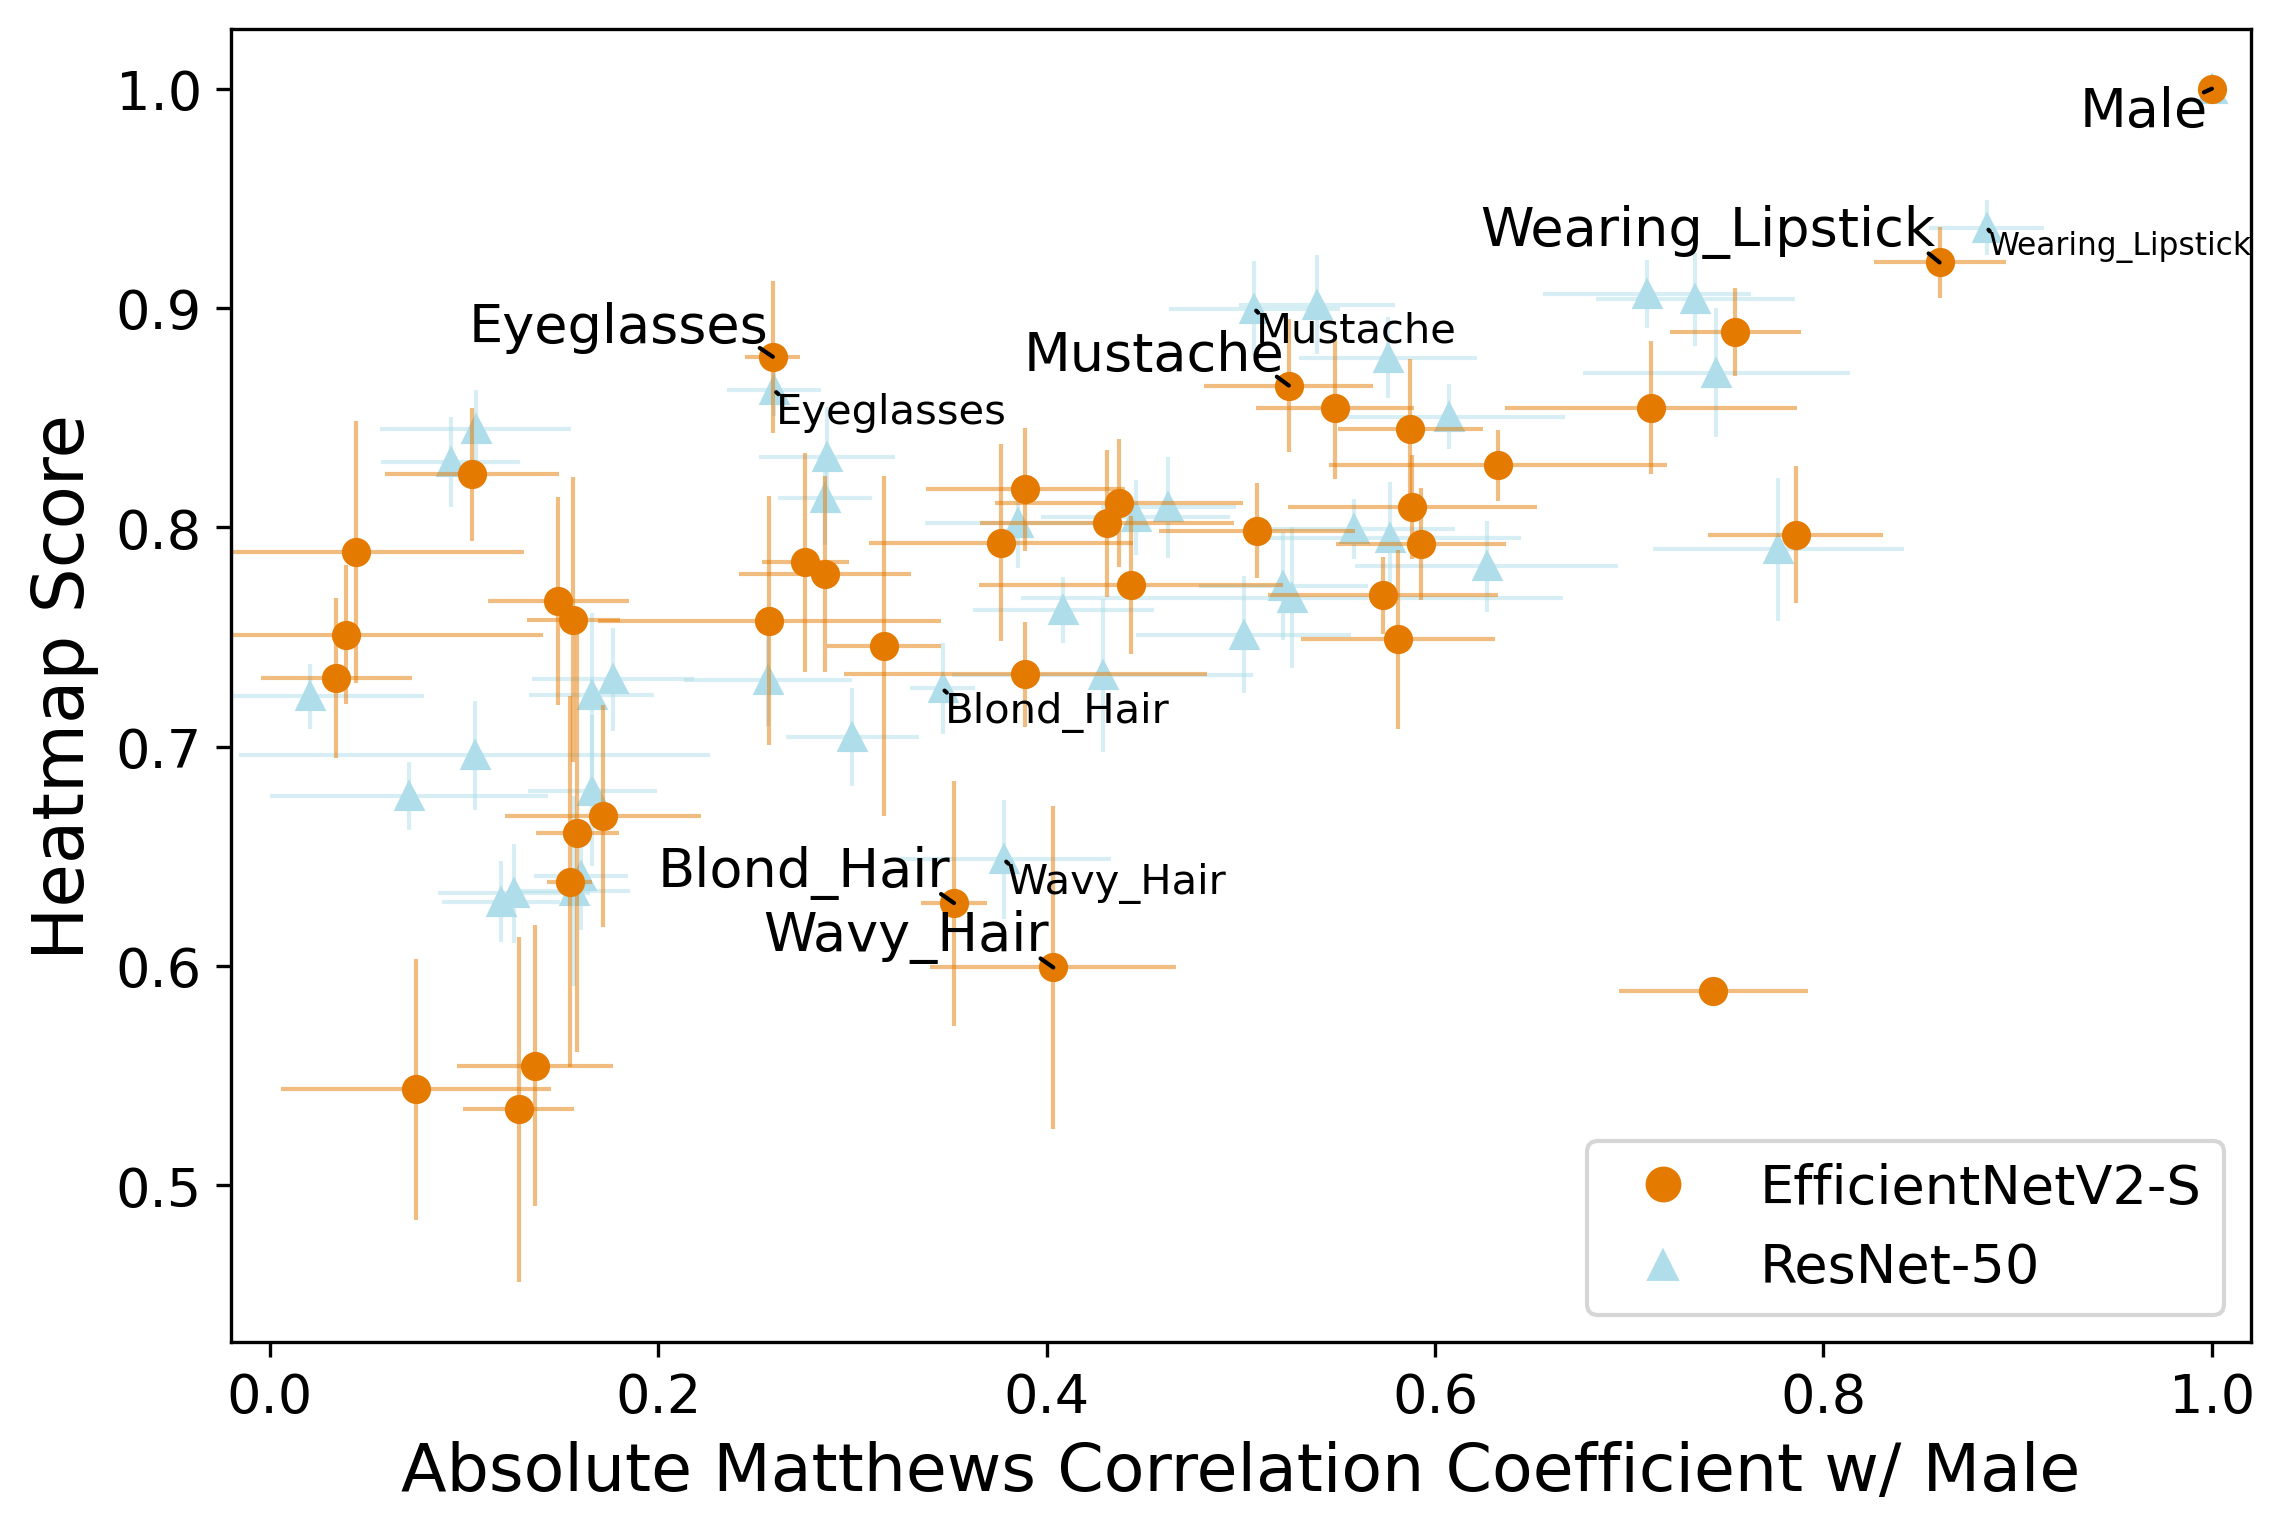

In [ ]:
scores = ("element_wise", "Element-wise")
# annotate = CelebBase.LABEL_DICT.keys()
plot_celeb_heatmap_rebuttal(CelebBase.LABEL_DICT.keys(), "Male", scores, True, model_target='all', results_dir = "model_results/efficientnet/", figure_dir="figures/", attribution="GradCAM", averaged=True)

In [ ]:
waterbirds_worst_group_efficientnet = np.array([[0.8399,0.0503],
                                                [0.8202,0.0514],
                                                [0.7955,0.0687],
                                                [0.7830,0.0356],
                                                [0.6548,0.0679],
                                                [0.5159,0.0577],
                                                [0.1994,0.0708]]).T
def plot_waterbirds_mask_rebuttal(
    percentages: list[int],
    normalize_scores,
    fig_size=5,
    attribution: str = "GradCAM",
    results_dir="results/",
    figure_dir="figures/",
):
    width = 0.8
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(fig_size * 1.8, fig_size*1.1),
        constrained_layout=True,
    )

    mask_groups = ["bird", "background"]
    mask_group_colors = {
        "bird":1,
        "background":11,
    }
    
    multiplier = 1
    for k, results_dir in enumerate(["model_results/efficientnet/", "results/waterbirds_mask/"]):
        data = {mask_group: ([], []) for mask_group in mask_groups}
        labels = []
        for i, percentage in enumerate(percentages):
            path = os.path.join(
                os.path.dirname(results_dir),
                f'Masks-waterbirds{percentage}_{attribution}_element_wise{"_normalized" if normalize_scores else ""}_averaged_scores.csv',
            )
            results = np.genfromtxt(path, delimiter=",")
            for j, mask_group in enumerate(mask_groups):
                data[mask_group][0].append(results[1-j, 2])
                data[mask_group][1].append(results[1-j, 5])
            # labels.append(f"{percentage}% Bias\nAP:{waterbirds_ap[0][i]:.2f}±{waterbirds_ap[1][i]:.2f}")
            labels.append(f"{percentage}% Bias\nWGA:{waterbirds_worst_group_efficientnet[0][i]:.2f}±{waterbirds_worst_group_efficientnet[1][i]:.2f}")
            
        y_pos = np.arange(len(labels))
        left = np.zeros(len(percentages))
        offset = width/2 * multiplier
        for mask_group, datapoint in data.items():
            if k == 1:
                p = ax.barh(y_pos+offset, datapoint[0][::-1], width/2, xerr=datapoint[1][::-1], capsize=3, 
                            color=colors[mask_group_colors[mask_group]], label="ResNet-50 " + mask_group, left=left, error_kw={"elinewidth":1, "alpha":0.7}, alpha=0.45)
            else:
                q = ax.barh(y_pos+offset, datapoint[0][::-1], width/2, xerr=datapoint[1][::-1], capsize=3, 
                            color=colors[mask_group_colors[mask_group]], label="EfficientNetV2-S " + mask_group, left=left, error_kw={"elinewidth":1})
                # print(str(q.patches))
            left += datapoint[0][::-1]
        multiplier -= 1
            
    ax.set_yticks(y_pos + width/4, labels=labels[::-1])
    ax.set_xlabel('Mask Score', fontsize=18)
    ax.tick_params(axis='x', labelrotation=0, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    # ax.set_title(f"Waterbirds Mask Score", fontsize=16)

    legend = ax.legend(loc="upper left", fancybox=True, fontsize=13, framealpha=0.95)
    save_path = os.path.join(
        os.path.abspath(figure_dir),
        f"Rebuttal-Waterbirds-Mask{'_Normalized' if normalize_scores else ''}.pdf",
    )
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=150, bbox_inches="tight")

    fig.show()

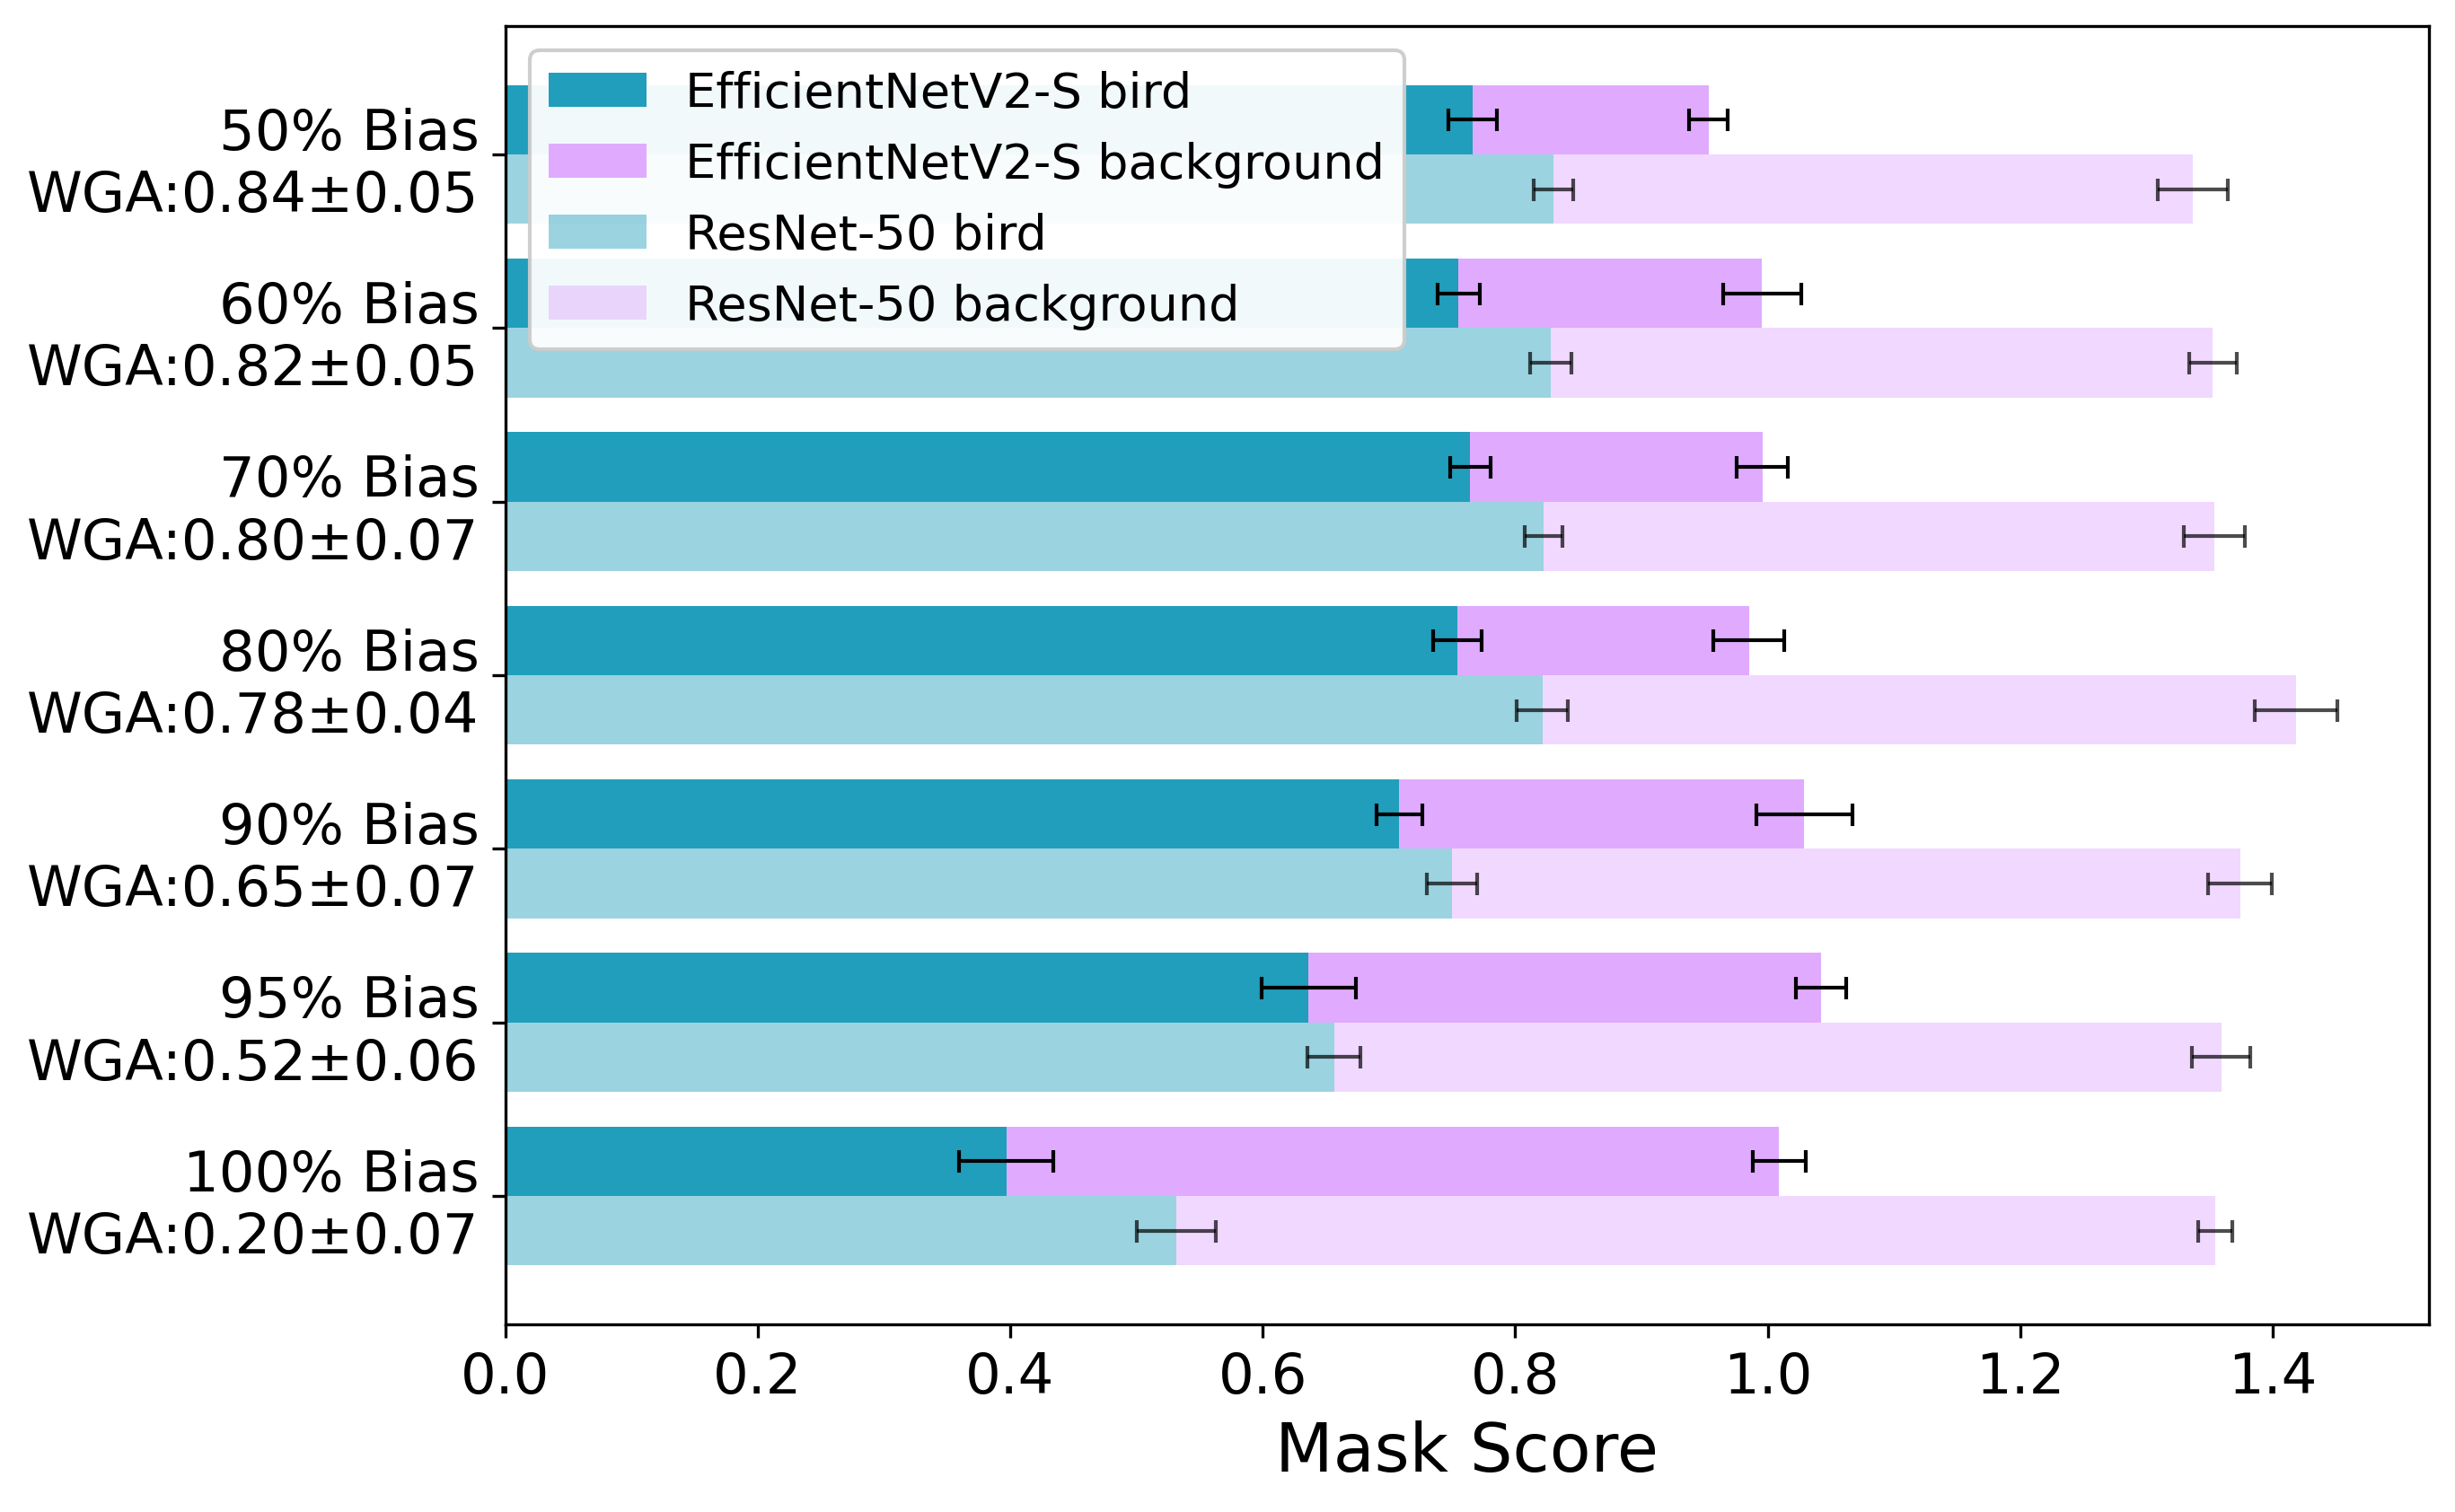

In [ ]:
percentages = ["50", "60", "70", "80", "90", "95", "100"]
# percentages = ["50", "70", "90", "95", "100"]
plot_waterbirds_mask_rebuttal(percentages, True, results_dir="model_results/efficientnet/", figure_dir="figures/")

In [ ]:
from bias import get_model
from bias_dataset import transform
from waterbirds import WaterbirdsDataset, WaterbirdsScorer
import torch
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms.v2 as transforms
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import cv2

In [ ]:
cub_dir = 'datasets/CUB_200_2011/'
places_dir = 'datasets/places365/'

dataset = WaterbirdsDataset(
            os.path.join("datasets/waterbirds", f"waterbird_complete{50}_forest2water2/"),
            224,
            augment_data=False,
        )
(train_data, val_data, test_data) = dataset.prepare_dataloaders(
        train=True
    )
test_loader = test_data.get_loader(
        shuffle=False,
        batch_size=64,
        num_workers=4,
        pin_memory=True,
    )

In [ ]:
writer = SummaryWriter()
load_path = os.path.abspath("models/waterbirds95_resnet18_0.pt")
model = get_model("resnet18", 2, False)
model.load_state_dict(torch.load(load_path))
device = torch.device("cuda:0")

scorer = WaterbirdsScorer(
            model,
            test_loader,
            device,
            "GradCAM",
            writer,
            "test_results/",
            True,
            False,
            waterbirds_percentage=50,
            num_samples=10000,
            multiple_figures=False,
            figure_frequency=0,
            resize_attentions=False
        )

In [ ]:
# from https://github.com/jacobgil/pytorch-grad-cam/blob/master/pytorch_grad_cam/utils/image.py

def crop_and_resize(source_img, target_img):
    """
    Make source_img exactly the same as target_img by expanding/shrinking and
    cropping appropriately.

    If source_img's dimensions are strictly greater than or equal to the
    corresponding target img dimensions, we crop left/right or top/bottom
    depending on aspect ratio, then shrink down.

    If any of source img's dimensions are smaller than target img's dimensions,
    we expand the source img and then crop accordingly

    Modified from
    https://stackoverflow.com/questions/4744372/reducing-the-width-height-of-an-image-to-fit-a-given-aspect-ratio-how-python
    """
    source_width = source_img.size[0]
    source_height = source_img.size[1]

    target_width = target_img.size[0]
    target_height = target_img.size[1]

    # Check if source does not completely cover target
    if (source_width < target_width) or (source_height < target_height):
        # Try matching width
        width_resize = (target_width, int((target_width / source_width) * source_height))
        if (width_resize[0] >= target_width) and (width_resize[1] >= target_height):
            source_resized = source_img.resize(width_resize, Image.LANCZOS)
        else:
            height_resize = (int((target_height / source_height) * source_width), target_height)
            assert (height_resize[0] >= target_width) and (height_resize[1] >= target_height)
            source_resized = source_img.resize(height_resize, Image.LANCZOS)
        # Rerun the cropping
        return crop_and_resize(source_resized, target_img)

    source_aspect = source_width / source_height
    target_aspect = target_width / target_height

    if source_aspect > target_aspect:
        # Crop left/right
        new_source_width = int(target_aspect * source_height)
        offset = (source_width - new_source_width) // 2
        resize = (offset, 0, source_width - offset, source_height)
    else:
        # Crop top/bottom
        new_source_height = int(source_width / target_aspect)
        offset = (source_height - new_source_height) // 2
        resize = (0, offset, source_width, source_height - offset)

    source_resized = source_img.crop(resize).resize((target_width, target_height), Image.LANCZOS)
    return source_resized


def combine_and_mask(img_new, mask, img_black):
    """
    Combine img_new, mask, and image_black based on the mask

    img_new: new (unmasked image)
    mask: binary mask of bird image
    img_black: already-masked bird image (bird only)
    """
    # Warp new img to match black img
    img_resized = crop_and_resize(img_new, img_black)
    img_resized_np = np.asarray(img_resized)

    # Mask new img
    img_masked_np = np.around(img_resized_np * (1 - mask)).astype(np.uint8)

    # Combine
    img_combined_np = np.asarray(img_black) + img_masked_np
    img_combined = Image.fromarray(img_combined_np)

    return img_combined

In [ ]:
def combine_files(img_filename, place_filename):
    img_path = os.path.join(cub_dir, 'images', img_filename)
    seg_path = os.path.join(cub_dir, 'segmentations', img_filename.replace('.jpg','.png'))
    img_np = np.asarray(Image.open(img_path).convert('RGB'))
    seg_np = np.asarray(Image.open(seg_path).convert('RGB')) / 255
    
    place_path = os.path.join(places_dir, 'data_large', place_filename)
    place = Image.open(place_path).convert('RGB')

    img_black = Image.fromarray(np.around(img_np * seg_np).astype(np.uint8))
    combined_img = combine_and_mask(place, seg_np, img_black)

    return combined_img

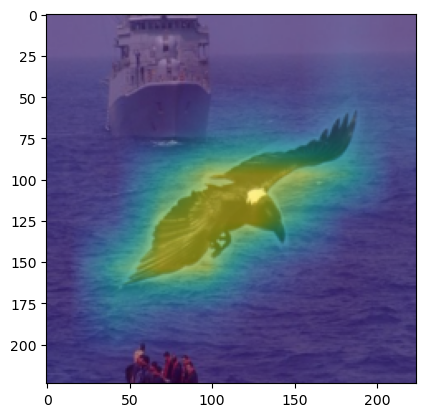

In [ ]:
image = combine_files("108.White_necked_Raven/White_Necked_Raven_0051_797383.jpg", "o/ocean/00000094.jpg")
t_image = transforms.functional.to_image(image.convert('RGB'))
t_image, mask = transform(t_image, torch.zeros_like(t_image), (224,224))
new_image = scorer.invert_image(t_image).detach().numpy()
attention = np.asarray(Image.open("figures/heatmap1.png").convert('RGB')) / 255
attention = cv2.resize(attention, dsize=(224,224))
heatmap = show_cam_on_image(new_image, 1-attention, image_weight=0.5, colormap=cv2.COLORMAP_VIRIDIS, use_rgb=True)
plt.imshow(heatmap)
Image.fromarray(heatmap).convert('RGB').save("final_figures/bird1.png")

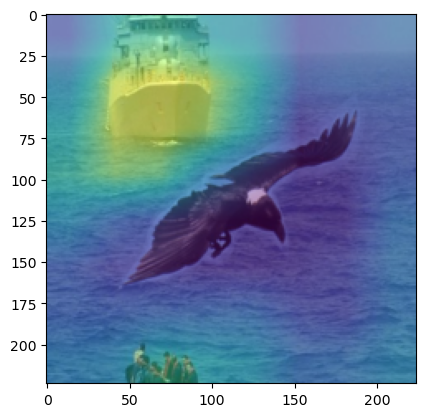

In [ ]:
# image = combine_files("010.Red_winged_Blackbird/Red_Winged_Blackbird_0011_5845.jpg", "o/ocean/00000094.jpg")
attention = np.asarray(Image.open("final_figures/heatmap2.png").convert('RGB')) / 255
attention = cv2.resize(attention, dsize=(224,224))
heatmap = show_cam_on_image(new_image, 1-attention, image_weight=0.5, colormap=cv2.COLORMAP_VIRIDIS, use_rgb=True)
plt.imshow(heatmap)
Image.fromarray(heatmap).convert('RGB').save("final_figures/bird2.png")
# Image.fromarray(get_attentions(image, 1)*225).convert('RGB').save("final_figures/heatmap2.png")

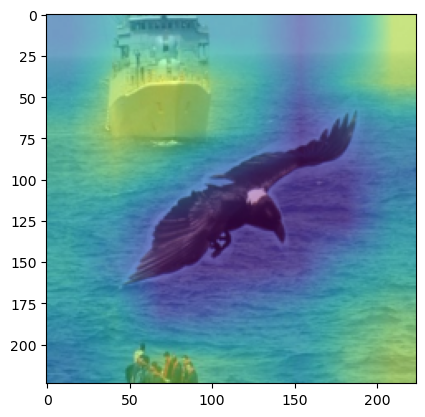

In [ ]:
attention = np.asarray(Image.open("final_figures/heatmap3.png").convert('RGB')) / 255
attention = cv2.resize(attention, dsize=(224,224))
heatmap = show_cam_on_image(new_image, 1-attention, image_weight=0.5, colormap=cv2.COLORMAP_VIRIDIS, use_rgb=True)
plt.imshow(heatmap)
Image.fromarray(heatmap).convert('RGB').save("final_figures/bird3.png")

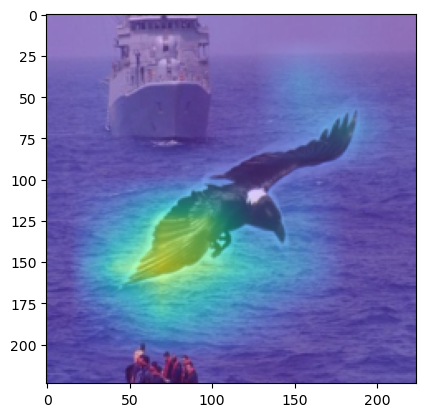

In [ ]:
attention = np.asarray(Image.open("final_figures/heatmap4.png").convert('RGB')) / 255
attention = cv2.resize(attention, dsize=(224,224))
heatmap = show_cam_on_image(new_image, 1-attention, image_weight=0.5, colormap=cv2.COLORMAP_VIRIDIS, use_rgb=True)
plt.imshow(heatmap)
Image.fromarray(heatmap).convert('RGB').save("final_figures/bird4.png")